In [1]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
sampled=pd.read_csv('cdsandvinyl_p1.csv')

In [3]:
sampled.isnull().sum()

Unnamed: 0            0
reviewerID            0
asin                  0
reviewerName          2
verified              0
reviewText            0
overall               0
reviewTime            0
summary               1
unixReviewTime        0
vote                  0
style                 0
category              0
tech1             70000
description           0
fit               70000
title                 1
also_buy              0
tech2             70000
brand               789
feature               0
rank                  0
main_cat              1
price             15851
details               0
type                  0
dtype: int64

In [4]:
sampled.drop(['tech1','tech2','fit'],axis=1,inplace=True)

In [5]:
sampled.dropna(inplace=True)

In [6]:
sampled.shape

(53739, 23)

In [7]:
sampled['price']=sampled['price'].astype('float64')

In [8]:
sampled.dtypes

Unnamed: 0          int64
reviewerID         object
asin               object
reviewerName       object
verified             bool
reviewText         object
overall             int64
reviewTime         object
summary            object
unixReviewTime      int64
vote               object
style              object
category           object
description        object
title              object
also_buy           object
brand              object
feature            object
rank               object
main_cat           object
price             float64
details            object
type               object
dtype: object

In [9]:
sampled['reviewTime']=pd.to_datetime(sampled['reviewTime'])

In [10]:
sampled.head(3)

,Unnamed: 0,reviewerID,asin,reviewerName,verified,reviewText,overall,reviewTime,summary,unixReviewTime,...,description,title,also_buy,brand,feature,rank,main_cat,price,details,type
0,2207097,A343PEALKIN1KE,B0002X590G,Mail-order Christ,False,"From December 2003 to December 2004, the world...",1,2005-01-05,Absolute tripe.,1104883200,...,['Check it -- there are two different versions...,The Chronicles of Life &amp; Death Death Art V...,"['B008DVJOMI', 'B07FDKXCYK', 'B000MTOUXW', 'B0...",Good Charlotte,[],"6,929 in CDs & Vinyl (","<img src=""https://images-na.ssl-images-amazon....",9.00,"{'Audio CD': '(October 5, 2004)', 'Original Re...",Punk
1,4596645,A11P6E1PLSHLA0,B000PY42T6,dorkboy,True,I am very impressed with this compilation. I'...,5,2008-02-06,Excellent compilation,1202256000,...,"[""Alfa Matrix is set to release the first offi...",Fuck The Mainstream Volume 1,[],Various,[],"661,750 in CDs & Vinyl (","<img src=""https://images-na.ssl-images-amazon....",37.72,"{'Audio CD': '(July 16, 2007)', 'Original Rele...",Goth
2,2902493,A2PU3TCNYAHY49,B0027OSSI8,augustus,True,"In lieu of her Back to Black album, I didn't f...",4,2011-10-23,Deep roots,1319328000,...,"[""2009 collection of tracks that inspired the ...",The Roots Of Amy Winehouse,"['B005OPY5HU', 'B000PKG7I4']",Various Blues,[],"314,693 in CDs & Vinyl (","<img src=""https://images-na.ssl-images-amazon....",9.09,"{'Audio CD': '(February 6, 2017)', 'Original R...",Pop


In [11]:
sampled['type']=sampled['type'].astype('string')

In [12]:
sampled['type'].value_counts()

Rock            14752
Pop              6399
Country          3650
Jazz             3372
Metal            2989
Punk             2721
Blues            2517
Alternative      2001
Folk             1870
Vocal            1502
New              1378
Europe           1370
Rap              1031
Progressive       976
RB                891
Latin             866
Industrial        794
Soundtracks       751
Goth              674
Soul              578
Hardcore          571
Ballets           331
Cuba              327
Forms             286
Comedy            219
Spoken            205
Post-Punk         190
Dance             174
Vocalists         102
Dances             84
Incidental         44
Africa             42
Ska                29
Lo-Fi              18
Wedding            15
Elegies             9
Music               6
Sonatas             5
Name: type, dtype: Int64

In [13]:
sampled['type']=sampled['type'].str.replace('Punk','Rock')

In [24]:
def conversion(string):
    string=re.sub(r'(Punk|Rap|Goth|Comedy|Ska)','Rock',string)
    string=re.sub(r'(Vocal|Progressive|Soul|Spoken|Lo-Fi)','Pop',string)
    string=re.sub(r'(Folk|Latin|HardCore|Post-Rock|Africa|Hardcore)','Country',string)
    string=re.sub(r'(Europe|RB|Ballets|Dance|Dances|Jazzs|Jazzs )','Jazz',string)
    string=re.sub(r'(New|Industrial|Cuba|Vocalists|Wedding|Music|Popists)','Metal',string)
    string=re.sub(r'(Alternative|Soundtracks|Forms|Incidental|Elegies|Sonatas)','Blues',string)
    return string

In [25]:
import re
sampled['type']=sampled['type'].apply(conversion)

In [26]:
sampled['type'].value_counts()

Rock        19426
Pop          9678
Country      7189
Jazz         6222
Blues        5613
Metal        5611
Name: type, dtype: int64

In [27]:
sampled.head(3)

,Unnamed: 0,reviewerID,asin,reviewerName,verified,reviewText,overall,reviewTime,summary,unixReviewTime,...,description,title,also_buy,brand,feature,rank,main_cat,price,details,type
0,2207097,A343PEALKIN1KE,B0002X590G,Mail-order Christ,False,from december to december the world of music h...,1,2005-01-05,Absolute tripe.,1104883200,...,['Check it -- there are two different versions...,The Chronicles of Life &amp; Death Death Art V...,"['B008DVJOMI', 'B07FDKXCYK', 'B000MTOUXW', 'B0...",Good Charlotte,[],"6,929 in CDs & Vinyl (","<img src=""https://images-na.ssl-images-amazon....",9.00,"{'Audio CD': '(October 5, 2004)', 'Original Re...",Rock
1,4596645,A11P6E1PLSHLA0,B000PY42T6,dorkboy,True,i am very impressed with this compilation i m ...,5,2008-02-06,Excellent compilation,1202256000,...,"[""Alfa Matrix is set to release the first offi...",Fuck The Mainstream Volume 1,[],Various,[],"661,750 in CDs & Vinyl (","<img src=""https://images-na.ssl-images-amazon....",37.72,"{'Audio CD': '(July 16, 2007)', 'Original Rele...",Rock
2,2902493,A2PU3TCNYAHY49,B0027OSSI8,augustus,True,in lieu of her back to black album i didn t fe...,4,2011-10-23,Deep roots,1319328000,...,"[""2009 collection of tracks that inspired the ...",The Roots Of Amy Winehouse,"['B005OPY5HU', 'B000PKG7I4']",Various Blues,[],"314,693 in CDs & Vinyl (","<img src=""https://images-na.ssl-images-amazon....",9.09,"{'Audio CD': '(February 6, 2017)', 'Original R...",Pop


In [28]:
def cleaning(text):
    # Remove all non-letters and non-spaces except for hyphens and digits
    text = re.sub("[^0-9A-Za-z\- ]+", " ", text)
    # Remove all numbers except those attached to a word
    text = re.sub("(?<!\w)\d+", "", text)
    # Remove all hyphens except between two words
    text = re.sub("-(?!\w)|(?<!\w)-", "", text)
    # Remove multiple spaces and lowercase everything
    text = " ".join(text.split())
    text = text.lower()
    return text

In [29]:
sampled['reviewText']=sampled['reviewText'].apply(cleaning)

In [30]:
sampled.head(3)

,Unnamed: 0,reviewerID,asin,reviewerName,verified,reviewText,overall,reviewTime,summary,unixReviewTime,...,description,title,also_buy,brand,feature,rank,main_cat,price,details,type
0,2207097,A343PEALKIN1KE,B0002X590G,Mail-order Christ,False,from december to december the world of music h...,1,2005-01-05,Absolute tripe.,1104883200,...,['Check it -- there are two different versions...,The Chronicles of Life &amp; Death Death Art V...,"['B008DVJOMI', 'B07FDKXCYK', 'B000MTOUXW', 'B0...",Good Charlotte,[],"6,929 in CDs & Vinyl (","<img src=""https://images-na.ssl-images-amazon....",9.00,"{'Audio CD': '(October 5, 2004)', 'Original Re...",Rock
1,4596645,A11P6E1PLSHLA0,B000PY42T6,dorkboy,True,i am very impressed with this compilation i m ...,5,2008-02-06,Excellent compilation,1202256000,...,"[""Alfa Matrix is set to release the first offi...",Fuck The Mainstream Volume 1,[],Various,[],"661,750 in CDs & Vinyl (","<img src=""https://images-na.ssl-images-amazon....",37.72,"{'Audio CD': '(July 16, 2007)', 'Original Rele...",Rock
2,2902493,A2PU3TCNYAHY49,B0027OSSI8,augustus,True,in lieu of her back to black album i didn t fe...,4,2011-10-23,Deep roots,1319328000,...,"[""2009 collection of tracks that inspired the ...",The Roots Of Amy Winehouse,"['B005OPY5HU', 'B000PKG7I4']",Various Blues,[],"314,693 in CDs & Vinyl (","<img src=""https://images-na.ssl-images-amazon....",9.09,"{'Audio CD': '(February 6, 2017)', 'Original R...",Pop


In [31]:
from textblob import TextBlob

In [32]:
def getPolarity(text):
    return TextBlob(text).sentiment.polarity

In [33]:
sampled['polarity']=sampled['reviewText'].apply(getPolarity)

In [34]:
sampled.head(3)

,Unnamed: 0,reviewerID,asin,reviewerName,verified,reviewText,overall,reviewTime,summary,unixReviewTime,...,title,also_buy,brand,feature,rank,main_cat,price,details,type,polarity
0,2207097,A343PEALKIN1KE,B0002X590G,Mail-order Christ,False,from december to december the world of music h...,1,2005-01-05,Absolute tripe.,1104883200,...,The Chronicles of Life &amp; Death Death Art V...,"['B008DVJOMI', 'B07FDKXCYK', 'B000MTOUXW', 'B0...",Good Charlotte,[],"6,929 in CDs & Vinyl (","<img src=""https://images-na.ssl-images-amazon....",9.00,"{'Audio CD': '(October 5, 2004)', 'Original Re...",Rock,0.008299
1,4596645,A11P6E1PLSHLA0,B000PY42T6,dorkboy,True,i am very impressed with this compilation i m ...,5,2008-02-06,Excellent compilation,1202256000,...,Fuck The Mainstream Volume 1,[],Various,[],"661,750 in CDs & Vinyl (","<img src=""https://images-na.ssl-images-amazon....",37.72,"{'Audio CD': '(July 16, 2007)', 'Original Rele...",Rock,0.508333
2,2902493,A2PU3TCNYAHY49,B0027OSSI8,augustus,True,in lieu of her back to black album i didn t fe...,4,2011-10-23,Deep roots,1319328000,...,The Roots Of Amy Winehouse,"['B005OPY5HU', 'B000PKG7I4']",Various Blues,[],"314,693 in CDs & Vinyl (","<img src=""https://images-na.ssl-images-amazon....",9.09,"{'Audio CD': '(February 6, 2017)', 'Original R...",Pop,0.206667


In [35]:
def getAnalysis(score):
    if score < 0:
        return 'Negative'
    elif score > 0 and score < 0.15:
        return 'Conflict'
    elif score >=0.15 and score <=0.25:
        return 'Neutral'
    else:
        return 'Positive'

In [36]:
sampled['Sentiment']=sampled['polarity'].apply(getAnalysis)

In [37]:
sampled.head(3)

,Unnamed: 0,reviewerID,asin,reviewerName,verified,reviewText,overall,reviewTime,summary,unixReviewTime,...,also_buy,brand,feature,rank,main_cat,price,details,type,polarity,Sentiment
0,2207097,A343PEALKIN1KE,B0002X590G,Mail-order Christ,False,from december to december the world of music h...,1,2005-01-05,Absolute tripe.,1104883200,...,"['B008DVJOMI', 'B07FDKXCYK', 'B000MTOUXW', 'B0...",Good Charlotte,[],"6,929 in CDs & Vinyl (","<img src=""https://images-na.ssl-images-amazon....",9.00,"{'Audio CD': '(October 5, 2004)', 'Original Re...",Rock,0.008299,Conflict
1,4596645,A11P6E1PLSHLA0,B000PY42T6,dorkboy,True,i am very impressed with this compilation i m ...,5,2008-02-06,Excellent compilation,1202256000,...,[],Various,[],"661,750 in CDs & Vinyl (","<img src=""https://images-na.ssl-images-amazon....",37.72,"{'Audio CD': '(July 16, 2007)', 'Original Rele...",Rock,0.508333,Positive
2,2902493,A2PU3TCNYAHY49,B0027OSSI8,augustus,True,in lieu of her back to black album i didn t fe...,4,2011-10-23,Deep roots,1319328000,...,"['B005OPY5HU', 'B000PKG7I4']",Various Blues,[],"314,693 in CDs & Vinyl (","<img src=""https://images-na.ssl-images-amazon....",9.09,"{'Audio CD': '(February 6, 2017)', 'Original R...",Pop,0.206667,Neutral


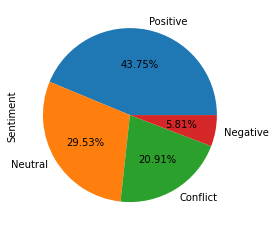

In [38]:
sampled['Sentiment'].value_counts().plot(kind='pie',autopct='%0.2f%%');

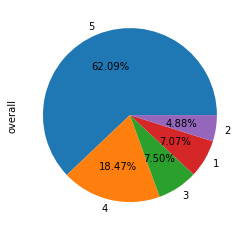

In [39]:
sampled['overall'].value_counts().plot(kind='pie',autopct='%0.2f%%');

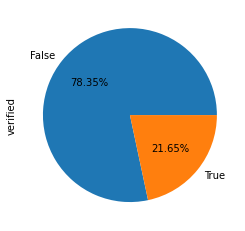

In [40]:
sampled['verified'].value_counts().plot(kind='pie',autopct='%0.2f%%');

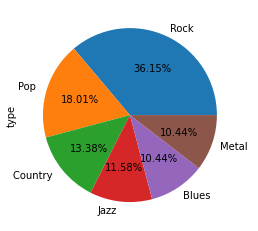

In [41]:
sampled['type'].value_counts().plot(kind='pie',autopct='%0.2f%%');

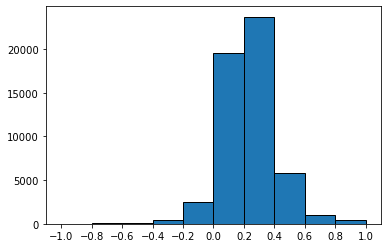

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns
n,bins,patches=plt.hist(sampled['polarity'],edgecolor='black');
plt.xticks(bins);

### classification

In [43]:
sampled

,Unnamed: 0,reviewerID,asin,reviewerName,verified,reviewText,overall,reviewTime,summary,unixReviewTime,...,also_buy,brand,feature,rank,main_cat,price,details,type,polarity,Sentiment
0,2207097,A343PEALKIN1KE,B0002X590G,Mail-order Christ,False,from december to december the world of music h...,1,2005-01-05,Absolute tripe.,1104883200,...,"['B008DVJOMI', 'B07FDKXCYK', 'B000MTOUXW', 'B0...",Good Charlotte,[],"6,929 in CDs & Vinyl (","<img src=""https://images-na.ssl-images-amazon....",9.00,"{'Audio CD': '(October 5, 2004)', 'Original Re...",Rock,0.008299,Conflict
1,4596645,A11P6E1PLSHLA0,B000PY42T6,dorkboy,True,i am very impressed with this compilation i m ...,5,2008-02-06,Excellent compilation,1202256000,...,[],Various,[],"661,750 in CDs & Vinyl (","<img src=""https://images-na.ssl-images-amazon....",37.72,"{'Audio CD': '(July 16, 2007)', 'Original Rele...",Rock,0.508333,Positive
2,2902493,A2PU3TCNYAHY49,B0027OSSI8,augustus,True,in lieu of her back to black album i didn t fe...,4,2011-10-23,Deep roots,1319328000,...,"['B005OPY5HU', 'B000PKG7I4']",Various Blues,[],"314,693 in CDs & Vinyl (","<img src=""https://images-na.ssl-images-amazon....",9.09,"{'Audio CD': '(February 6, 2017)', 'Original R...",Pop,0.206667,Neutral
3,4002184,A22XZ3IJSRTQ1O,B000008N9L,the old guitarist,False,the main musical theme in the river wild is th...,5,2008-05-08,one of my favorites,1210204800,...,[],Jerry Goldsmith,[],"240,623 in CDs & Vinyl (","<img src=""https://images-na.ssl-images-amazon....",12.87,"{'Audio CD': '(September 13, 1994)', 'Number o...",Blues,0.153652,Neutral
5,673432,A2E21E58TG7NEO,B000003S28,Steve,False,decent remaster but why the changed order of s...,4,2009-11-23,Good remaster but...,1258934400,...,"['B002DKF54Q', 'B002DKF57I', 'B0002PZVGQ', 'B0...",Brian Eno,[],"715,172 in CDs & Vinyl (","<img src=""https://images-na.ssl-images-amazon....",14.99,"{'Audio CD': '(August 31, 1990)', 'Number of D...",Rock,0.190278,Neutral
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69994,214396,ARVTMCO3DJ3KP,B0000025AY,Robert,True,a classic,5,2016-12-09,Five Stars,1481241600,...,"['B00DJYKEAK', 'B0015XAT7U', 'B00JRBGDBS', 'B0...",Journey,[],"492,862 in CDs & Vinyl (","<img src=""https://images-na.ssl-images-amazon....",3.25,"{'Audio CD': '(June 28, 1994)', 'Number of Dis...",Rock,0.166667,Neutral
69995,3130006,A3CY2YHWUPY710,B005QJZ5FA,april,False,omg i heard this on spotify and she had me hoo...,5,2012-02-05,holy moly!!!,1328400000,...,"['B00K5T1LZY', 'B072K3PSH6', 'B0147IF63Q', 'B0...",Lana Del Rey,[],"2,330 in CDs & Vinyl (","<img src=""https://images-na.ssl-images-amazon....",7.99,"{'Audio CD': '(January 31, 2012)', 'Original R...",Rock,0.130000,Conflict
69996,563760,A2BTM7UHSOSSVQ,B000002UTN,Debbi,True,gift for grandson who loves country music hard...,5,2014-12-28,so chose this on the basis of other reviews an...,1419724800,...,"['B000002UWB', 'B000002V16']",Garth Brooks,[],"329,412 in CDs & Vinyl (","<img src=""https://images-na.ssl-images-amazon....",19.99,"{'Audio Cassette': '(May 18, 1989)', 'Number o...",Country,0.027778,Conflict
69997,366819,ANHVE4JUUNJRI,B000002GYW,Amazon Customer,False,i have oh i dunno maybe lp records some casett...,5,2005-11-10,Western Concept Album,1131580800,...,"['B000002GXX', 'B000002GYN', 'B000002GXO', 'B0...",Eagles,[],"6,079 in CDs & Vinyl (","<img src=""https://images-na.ssl-images-amazon....",9.19,"{'Audio CD': '(February 15, 1987)', 'Original ...",Rock,0.177001,Neutral


In [44]:
pd.options.display.max_columns=None
sampled

,Unnamed: 0,reviewerID,asin,reviewerName,verified,reviewText,overall,reviewTime,summary,unixReviewTime,vote,style,category,description,title,also_buy,brand,feature,rank,main_cat,price,details,type,polarity,Sentiment
0,2207097,A343PEALKIN1KE,B0002X590G,Mail-order Christ,False,from december to december the world of music h...,1,2005-01-05,Absolute tripe.,1104883200,3,{'Format:': ' Audio CD'},"['CDs & Vinyl', 'Alternative Rock', 'Hardcore ...",['Check it -- there are two different versions...,The Chronicles of Life &amp; Death Death Art V...,"['B008DVJOMI', 'B07FDKXCYK', 'B000MTOUXW', 'B0...",Good Charlotte,[],"6,929 in CDs & Vinyl (","<img src=""https://images-na.ssl-images-amazon....",9.00,"{'Audio CD': '(October 5, 2004)', 'Original Re...",Rock,0.008299,Conflict
1,4596645,A11P6E1PLSHLA0,B000PY42T6,dorkboy,True,i am very impressed with this compilation i m ...,5,2008-02-06,Excellent compilation,1202256000,2,{'Format:': ' Audio CD'},"['CDs & Vinyl', 'Alternative Rock', 'Goth & In...","[""Alfa Matrix is set to release the first offi...",Fuck The Mainstream Volume 1,[],Various,[],"661,750 in CDs & Vinyl (","<img src=""https://images-na.ssl-images-amazon....",37.72,"{'Audio CD': '(July 16, 2007)', 'Original Rele...",Rock,0.508333,Positive
2,2902493,A2PU3TCNYAHY49,B0027OSSI8,augustus,True,in lieu of her back to black album i didn t fe...,4,2011-10-23,Deep roots,1319328000,2,{'Format:': ' Audio CD'},"['CDs & Vinyl', 'Pop', 'Oldies', 'Traditional ...","[""2009 collection of tracks that inspired the ...",The Roots Of Amy Winehouse,"['B005OPY5HU', 'B000PKG7I4']",Various Blues,[],"314,693 in CDs & Vinyl (","<img src=""https://images-na.ssl-images-amazon....",9.09,"{'Audio CD': '(February 6, 2017)', 'Original R...",Pop,0.206667,Neutral
3,4002184,A22XZ3IJSRTQ1O,B000008N9L,the old guitarist,False,the main musical theme in the river wild is th...,5,2008-05-08,one of my favorites,1210204800,15,{'Format:': ' Audio CD'},"['CDs & Vinyl', 'Soundtracks', 'Movie Soundtra...","['CD consists of 10 songs**Music composed, con...",The River Wild Soundtrack,[],Jerry Goldsmith,[],"240,623 in CDs & Vinyl (","<img src=""https://images-na.ssl-images-amazon....",12.87,"{'Audio CD': '(September 13, 1994)', 'Number o...",Blues,0.153652,Neutral
5,673432,A2E21E58TG7NEO,B000003S28,Steve,False,decent remaster but why the changed order of s...,4,2009-11-23,Good remaster but...,1258934400,3,{'Format:': ' Audio CD'},"['CDs & Vinyl', 'Rock', 'Progressive', 'Progre...",[],Music for Films,"['B002DKF54Q', 'B002DKF57I', 'B0002PZVGQ', 'B0...",Brian Eno,[],"715,172 in CDs & Vinyl (","<img src=""https://images-na.ssl-images-amazon....",14.99,"{'Audio CD': '(August 31, 1990)', 'Number of D...",Rock,0.190278,Neutral
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69994,214396,ARVTMCO3DJ3KP,B0000025AY,Robert,True,a classic,5,2016-12-09,Five Stars,1481241600,2,{'Format:': ' MP3 Music'},"['CDs & Vinyl', 'Classic Rock', 'Album-Oriente...",['Journey ~ Infinity'],Infinity,"['B00DJYKEAK', 'B0015XAT7U', 'B00JRBGDBS', 'B0...",Journey,[],"492,862 in CDs & Vinyl (","<img src=""https://images-na.ssl-images-amazon....",3.25,"{'Audio CD': '(June 28, 1994)', 'Number of Dis...",Rock,0.166667,Neutral
69995,3130006,A3CY2YHWUPY710,B005QJZ5FA,april,False,omg i heard this on spotify and she had me hoo...,5,2012-02-05,holy moly!!!,1328400000,8,{'Format:': ' MP3 Music'},"['CDs & Vinyl', 'Alternative Rock', 'Indie & L...",['Highly anticipated 2012 debut album from the...,Born to Die,"['B00K5T1LZY', 'B072K3PSH6', 'B0147IF63Q', 'B0...",Lana Del Rey,[],"2,330 in CDs & Vinyl (","<img src=""https://images-na.ssl-images-amazon....",7.99,"{'Audio CD': '(January 31, 2012)', 'Original R...",Rock,0.130000,Conflict
69996,563760,A2BTM7UHSOSSVQ,B000002UTN,Debbi,True,gift for grandson who loves country music hard...,5,2014-12-28,so chose this on the basis of other reviews an...,1419724800,2,{'Format:': ' Audio CD'},"['CDs & Vinyl', 'Country', ""Today's Country

In [45]:
sampled['summary']=sampled['summary'].apply(cleaning)

In [46]:
cl=sampled.loc[:,['reviewText','overall','summary','verified','brand','price','type','polarity','Sentiment']]
cl1=cl.copy()

In [47]:
a=['verified','type','Sentiment']
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
for i in a:
    cl[i]=encoder.fit_transform(cl[i])
    
cl.head(3)

,reviewText,overall,summary,verified,brand,price,type,polarity,Sentiment
0,from december to december the world of music h...,1,absolute tripe,0,Good Charlotte,9.00,5,0.008299,0
1,i am very impressed with this compilation i m ...,5,excellent compilation,1,Various,37.72,5,0.508333,3
2,in lieu of her back to black album i didn t fe...,4,deep roots,1,Various Blues,9.09,4,0.206667,2


In [48]:
x=cl.iloc[:,0:8]

In [49]:
x.dtypes

reviewText     object
overall         int64
summary        object
verified        int64
brand          object
price         float64
type            int32
polarity      float64
dtype: object

In [50]:
y=cl['Sentiment']

In [51]:
cl['Sentiment'].value_counts()

3    23509
2    15868
0    11239
1     3123
Name: Sentiment, dtype: int64

In [52]:
from sklearn.model_selection import train_test_split

In [53]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [54]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier

In [55]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import Binarizer,MultiLabelBinarizer,LabelEncoder
from sklearn.metrics import recall_score,f1_score,accuracy_score,precision_score,classification_report,confusion_matrix

In [56]:
x_train,x_test,y_train,y_test=train_test_split(x['reviewText'],y,train_size=0.8,random_state=42)

In [57]:
tf=TfidfVectorizer(stop_words='english')

In [58]:
train=tf.fit_transform(x_train)
test=tf.transform(x_test)

In [59]:
lr=LogisticRegression()  #logistic regression
lr.fit(train,y_train)

LogisticRegression()

In [60]:
y_pred=lr.predict(test)

In [61]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.55      0.58      0.56      2091
           1       0.31      0.79      0.44       261
           2       0.55      0.57      0.56      3060
           3       0.88      0.77      0.82      5336

    accuracy                           0.68     10748
   macro avg       0.57      0.68      0.60     10748
weighted avg       0.71      0.68      0.69     10748



In [62]:
from sklearn.naive_bayes import MultinomialNB #Multinomial NB
mnb=MultinomialNB()
mnb.fit(train,y_train)

MultinomialNB()

In [63]:
y_pred1=mnb.predict(test)

In [64]:
print(classification_report(y_pred1,y_test))

              precision    recall  f1-score   support

           0       0.00      0.17      0.01        41
           1       0.00      0.00      0.00         0
           2       0.19      0.36      0.25      1689
           3       0.97      0.50      0.66      9018

    accuracy                           0.48     10748
   macro avg       0.29      0.26      0.23     10748
weighted avg       0.84      0.48      0.59     10748



In [65]:
rf=RandomForestClassifier(max_depth=4,n_estimators=5)    #randomforestclassifier
rf.fit(train,y_train)

RandomForestClassifier(max_depth=4, n_estimators=5)

In [66]:
from sklearn.model_selection import GridSearchCV

In [67]:
grid={'max_depth':[4,5,6],'n_estimators':[5,8,10]}

In [68]:
grid_search=GridSearchCV(estimator=rf,param_grid=grid,cv=5,scoring='accuracy')

In [69]:
grid_search.fit(train,y_train)

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(max_depth=4, n_estimators=5),
             param_grid={'max_depth': [4, 5, 6], 'n_estimators': [5, 8, 10]},
             scoring='accuracy')

In [70]:
grid_search.best_estimator_

RandomForestClassifier(max_depth=6, n_estimators=5)

In [71]:
rfc1=RandomForestClassifier(max_depth=6,n_estimators=5)
rfc1.fit(train,y_train)

RandomForestClassifier(max_depth=6, n_estimators=5)

In [72]:
y_pred2=rfc1.predict(test)

In [73]:
print(classification_report(y_pred2,y_test))

              precision    recall  f1-score   support

           0       0.00      0.29      0.01        31
           1       0.00      0.00      0.00         0
           2       0.09      0.47      0.16       636
           3       0.97      0.45      0.62     10081

    accuracy                           0.45     10748
   macro avg       0.27      0.30      0.20     10748
weighted avg       0.92      0.45      0.59     10748



In [74]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier()
dtc.fit(train,y_train)

DecisionTreeClassifier()

In [75]:
y_pred3=dtc.predict(test)

In [76]:
print(classification_report(y_pred3,y_test))

              precision    recall  f1-score   support

           0       0.36      0.36      0.36      2222
           1       0.33      0.41      0.37       547
           2       0.39      0.40      0.40      3104
           3       0.67      0.65      0.66      4875

    accuracy                           0.50     10748
   macro avg       0.44      0.45      0.45     10748
weighted avg       0.51      0.50      0.51     10748



In [77]:
dict={'Model':['Decision Tree Classifier','Multinomial NB','Random Forest Classifier'],'Accuracy':[0.51,0.48,0.45],'F1_score':[0.51,0.59,0.60]}
compare=pd.DataFrame(dict)
compare

,Model,Accuracy,F1_score
0,Decision Tree Classifier,0.51,0.51
1,Multinomial NB,0.48,0.59
2,Random Forest Classifier,0.45,0.60


### multiple columns

In [78]:
x.head()

,reviewText,overall,summary,verified,brand,price,type,polarity
0,from december to december the world of music h...,1,absolute tripe,0,Good Charlotte,9.00,5,0.008299
1,i am very impressed with this compilation i m ...,5,excellent compilation,1,Various,37.72,5,0.508333
2,in lieu of her back to black album i didn t fe...,4,deep roots,1,Various Blues,9.09,4,0.206667
3,the main musical theme in the river wild is th...,5,one of my favorites,0,Jerry Goldsmith,12.87,0,0.153652
5,decent remaster but why the changed order of s...,4,good remaster but,0,Brian Eno,14.99,5,0.190278


In [79]:
tfr=tf.transform(x['reviewText'])

In [80]:
r=[]
for i in tfr:
    r.append(i.toarray().sum())

In [81]:
x['review_num']=r

In [82]:
tfs=tf.transform(x['summary'])
s=[]
for i in tfs:
    s.append(i.toarray().sum())

In [83]:
x['summary_num']=s

In [84]:
x.head()

,reviewText,overall,summary,verified,brand,price,type,polarity,review_num,summary_num
0,from december to december the world of music h...,1,absolute tripe,0,Good Charlotte,9.00,5,0.008299,14.988007,1.381138
1,i am very impressed with this compilation i m ...,5,excellent compilation,1,Various,37.72,5,0.508333,2.808083,1.403171
2,in lieu of her back to black album i didn t fe...,4,deep roots,1,Various Blues,9.09,4,0.206667,3.782583,1.411033
3,the main musical theme in the river wild is th...,5,one of my favorites,0,Jerry Goldsmith,12.87,0,0.153652,9.791767,1.000000
5,decent remaster but why the changed order of s...,4,good remaster but,0,Brian Eno,14.99,5,0.190278,3.877690,1.275733


In [85]:
x1=x.loc[:,['overall','verified','review_num','type','price','polarity']]
y1=sampled['Sentiment']

In [86]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
x_sd=pd.DataFrame(scaler.fit_transform(x1),columns=x1.columns)

In [87]:
x1_train,x1_test,y1_train,y1_test=train_test_split(x_sd,y1,train_size=0.8,random_state=42)

In [88]:
lre=LogisticRegression()    #logistic regression
lre.fit(x1_train,y1_train)

LogisticRegression()

In [89]:
lre.score(x1_train,y1_train)

0.8942569374985462

In [90]:
y1_pred=lre.predict(x1_test)

In [91]:
print(classification_report(y1_pred,y1_test))

              precision    recall  f1-score   support

    Conflict       0.83      0.84      0.84      2184
    Negative       0.66      0.98      0.79       452
     Neutral       0.90      0.86      0.88      3360
    Positive       0.95      0.94      0.94      4752

    accuracy                           0.89     10748
   macro avg       0.84      0.90      0.86     10748
weighted avg       0.90      0.89      0.90     10748



In [92]:
from sklearn.naive_bayes import GaussianNB   #Gaussian NB
gnb=GaussianNB()       
gnb.fit(x1_train,y1_train)

GaussianNB()

In [93]:
y1_pred1=gnb.predict(x1_test)

In [94]:
print(classification_report(y1_pred1,y1_test))

              precision    recall  f1-score   support

    Conflict       0.90      0.93      0.92      2126
    Negative       0.92      0.81      0.86       765
     Neutral       0.89      0.93      0.91      3057
    Positive       0.94      0.92      0.93      4800

    accuracy                           0.92     10748
   macro avg       0.91      0.90      0.91     10748
weighted avg       0.92      0.92      0.92     10748



In [95]:
from sklearn.neighbors import KNeighborsClassifier
knc = KNeighborsClassifier()                            # Training the model
knc=knc.fit(x1_train, y1_train)
y_pred1 = knc.predict(x1_test) 

In [96]:
print(classification_report(y_pred1,y1_test))

              precision    recall  f1-score   support

    Conflict       0.93      0.90      0.91      2274
    Negative       0.85      0.95      0.90       607
     Neutral       0.94      0.92      0.93      3253
    Positive       0.96      0.97      0.97      4614

    accuracy                           0.94     10748
   macro avg       0.92      0.93      0.93     10748
weighted avg       0.94      0.94      0.94     10748



### Clustering

In [97]:
from sklearn.cluster import KMeans

In [98]:
x_sd

,overall,verified,review_num,type,price,polarity
0,0.00,0.0,0.627707,1.0,0.017981,0.504150
1,1.00,1.0,0.117604,1.0,0.075426,0.754167
2,0.75,1.0,0.158417,0.8,0.018161,0.603333
3,1.00,0.0,0.410085,0.0,0.025722,0.576826
4,0.75,0.0,0.162400,1.0,0.029962,0.595139
...,...,...,...,...,...,...
53734,1.00,1.0,0.041881,1.0,0.006481,0.583333
53735,1.00,0.0,0.204676,1.0,0.015961,0.565000
53736,1.00,1.0,0.169628,0.2,0.039963,0.513889
53737,1.00,0.0,0.409002,1.0,0.018361,0.588500


In [99]:
km=KMeans(n_clusters=6)                   #polarity and type
k_m=km.fit_predict(x_sd.iloc[:,3:7:3])

In [100]:
x_sd['ty']=k_m
x_sd.head()

,overall,verified,review_num,type,price,polarity,ty
0,0.00,0.0,0.627707,1.0,0.017981,0.504150,1
1,1.00,1.0,0.117604,1.0,0.075426,0.754167,1
2,0.75,1.0,0.158417,0.8,0.018161,0.603333,2
3,1.00,0.0,0.410085,0.0,0.025722,0.576826,3
4,0.75,0.0,0.162400,1.0,0.029962,0.595139,1


In [101]:
x_sd["ty"].replace({0:"Blues",1:"Country",2:"Jazz",3:'Metal',4:'Pop',5:'Rock'},inplace=True)

In [102]:
x_sd.head()

,overall,verified,review_num,type,price,polarity,ty
0,0.00,0.0,0.627707,1.0,0.017981,0.504150,Country
1,1.00,1.0,0.117604,1.0,0.075426,0.754167,Country
2,0.75,1.0,0.158417,0.8,0.018161,0.603333,Jazz
3,1.00,0.0,0.410085,0.0,0.025722,0.576826,Metal
4,0.75,0.0,0.162400,1.0,0.029962,0.595139,Country


In [103]:
x1['Genre']=k_m
x1["Genre"].replace({0:"Blues",1:"Country",2:"Jazz",3:'Metal',4:'Pop',5:'Rock'},inplace=True)
x1.head()

,overall,verified,review_num,type,price,polarity,Genre
0,1,0,14.988007,5,9.00,0.008299,Country
1,5,1,2.808083,5,37.72,0.508333,Country
2,4,1,3.782583,4,9.09,0.206667,Jazz
3,5,0,9.791767,0,12.87,0.153652,Metal
5,4,0,3.877690,5,14.99,0.190278,Country


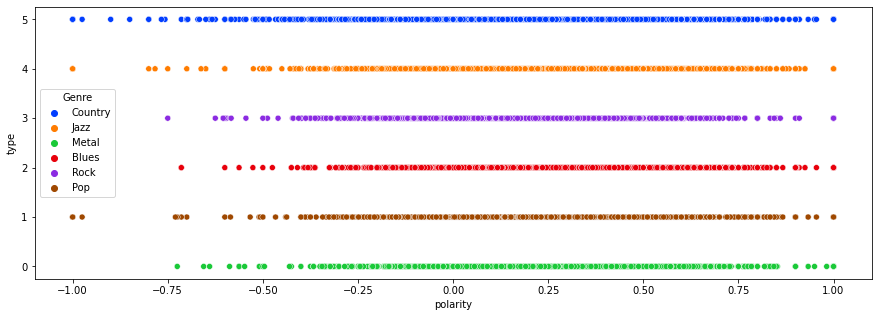

In [104]:
plt.figure(figsize=(15,5))
sns.scatterplot(x1['polarity'],x1['type'],hue=x1['Genre'],palette='bright');


In [105]:
km1=KMeans(n_clusters=4)                   #polarity and text
k_m1=km1.fit_predict(x_sd.iloc[:,2:6:3])

In [106]:
x_sd['sentiment']=k_m1
x_sd["sentiment"].replace({0:"Neutral",1:"conflict",2:"Negative",3:'Positive'},inplace=True)
x_sd.head()


,overall,verified,review_num,type,price,polarity,ty,sentiment
0,0.00,0.0,0.627707,1.0,0.017981,0.504150,Country,Negative
1,1.00,1.0,0.117604,1.0,0.075426,0.754167,Country,conflict
2,0.75,1.0,0.158417,0.8,0.018161,0.603333,Jazz,Neutral
3,1.00,0.0,0.410085,0.0,0.025722,0.576826,Metal,Negative
4,0.75,0.0,0.162400,1.0,0.029962,0.595139,Country,Neutral


<AxesSubplot:xlabel='polarity', ylabel='review_num'>

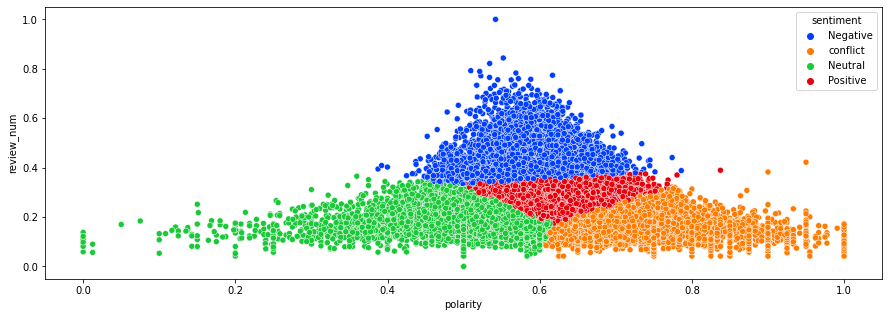

In [107]:
plt.figure(figsize=(15,5))
sns.scatterplot(x=x_sd['polarity'],y=x_sd['review_num'],hue=x_sd['sentiment'],palette='bright')

In [108]:
km2=KMeans(n_clusters=2)          #verified with polarity
k_m2=km2.fit_predict(x_sd.iloc[:,1:4:2])

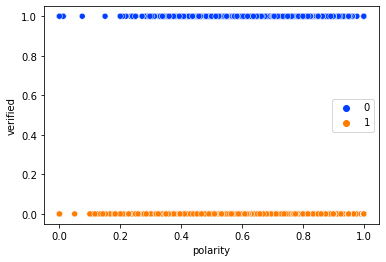

In [109]:
sns.scatterplot(x_sd['polarity'],x_sd['verified'],hue=k_m2,palette='bright');

In [110]:
km3=KMeans(n_clusters=4)                      #polarity with price
k_m3=km3.fit_predict(x_sd.iloc[:,4:6])

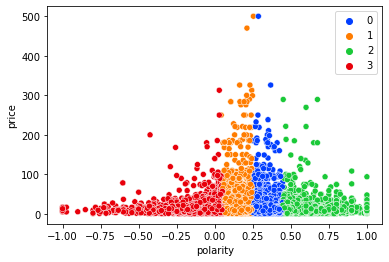

In [111]:
sns.scatterplot(x1['polarity'],x1['price'],hue=k_m3,palette='bright');

In [112]:
cl1['review_num']=r
cl1.head(3)

,reviewText,overall,summary,verified,brand,price,type,polarity,Sentiment,review_num
0,from december to december the world of music h...,1,absolute tripe,False,Good Charlotte,9.00,Rock,0.008299,Conflict,14.988007
1,i am very impressed with this compilation i m ...,5,excellent compilation,True,Various,37.72,Rock,0.508333,Positive,2.808083
2,in lieu of her back to black album i didn t fe...,4,deep roots,True,Various Blues,9.09,Pop,0.206667,Neutral,3.782583


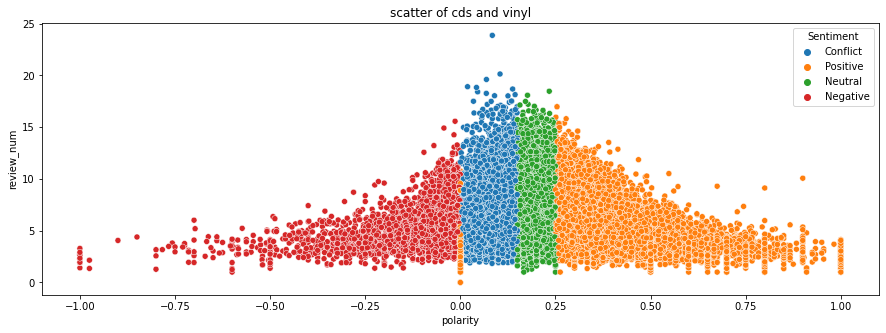

In [113]:
plt.figure(figsize=(15,5))
sns.scatterplot(x=cl1['polarity'],y=cl1['review_num'],hue=cl1['Sentiment']);
plt.title('scatter of cds and vinyl');

### Time series

In [114]:
s=sampled.copy()
s.head(2)

,Unnamed: 0,reviewerID,asin,reviewerName,verified,reviewText,overall,reviewTime,summary,unixReviewTime,vote,style,category,description,title,also_buy,brand,feature,rank,main_cat,price,details,type,polarity,Sentiment
0,2207097,A343PEALKIN1KE,B0002X590G,Mail-order Christ,False,from december to december the world of music h...,1,2005-01-05,absolute tripe,1104883200,3,{'Format:': ' Audio CD'},"['CDs & Vinyl', 'Alternative Rock', 'Hardcore ...",['Check it -- there are two different versions...,The Chronicles of Life &amp; Death Death Art V...,"['B008DVJOMI', 'B07FDKXCYK', 'B000MTOUXW', 'B0...",Good Charlotte,[],"6,929 in CDs & Vinyl (","<img src=""https://images-na.ssl-images-amazon....",9.00,"{'Audio CD': '(October 5, 2004)', 'Original Re...",Rock,0.008299,Conflict
1,4596645,A11P6E1PLSHLA0,B000PY42T6,dorkboy,True,i am very impressed with this compilation i m ...,5,2008-02-06,excellent compilation,1202256000,2,{'Format:': ' Audio CD'},"['CDs & Vinyl', 'Alternative Rock', 'Goth & In...","[""Alfa Matrix is set to release the first offi...",Fuck The Mainstream Volume 1,[],Various,[],"661,750 in CDs & Vinyl (","<img src=""https://images-na.ssl-images-amazon....",37.72,"{'Audio CD': '(July 16, 2007)', 'Original Rele...",Rock,0.508333,Positive


In [115]:
s.set_index('reviewTime',inplace=True)
s.sort_index(inplace=True)

In [116]:
s.head(2)

,Unnamed: 0,reviewerID,asin,reviewerName,verified,reviewText,overall,summary,unixReviewTime,vote,style,category,description,title,also_buy,brand,feature,rank,main_cat,price,details,type,polarity,Sentiment
reviewTime,,,,,,,,,,,,,,,,,,,,,,,,
1998-01-24,303132,A2KX8QYDR8BX9W,B0000029YC,elteto@juno.com,False,until december sound systems in movie theaters...,5,a new dimension in music a landmark in music h...,885600000,2,{'Format:': ' Audio CD'},"['CDs & Vinyl', 'Pop', 'Oldies', 'Traditional ...","[""The soundtrack to James Cameron's epic film,...",Titanic: Music from the Motion Picture,"['B00000ADKZ', 'B000004286', 'B007SPPANM', 'B0...",James Horner,[],"25,293 in CDs & Vinyl (","<img src=""https://images-na.ssl-images-amazon....",11.88,"{'Audio CD': '(November 25, 1997)', 'Number of...",Pop,0.207925,Neutral
1998-04-20,218101,A3E7SVH8188LMS,B00000257S,Mr. Hendricks (slrjg@cc.usu.edu),False,this is pre-steve perry journey at it s best s...,5,this is the best journey album ever,893030400,4,{'Format:': ' Audio CD'},"['CDs & Vinyl', 'Rock', 'Progressive', 'Progre...",['JOURNEY Next CD'],Next,"['B0012GMW9I', 'B0012GMW0C', 'B0054YHAAU', 'B0...",Journey,[],"553,436 in CDs & Vinyl (","<img src=""https://images-na.ssl-images-amazon....",12.36,"{'Audio CD': '(March 26, 1991)', 'Number of Di...",Rock,0.461607,Positive


In [117]:
s['type'].unique()

array(['Pop ', 'Rock ', 'Jazz ', 'Country ', 'Blues ', 'Metal '],
      dtype=object)

In [118]:
sampled_pop=s[s.type=='Pop ']
sampled_rock=s[s.type=='Rock ']
sampled_jazz=s[s.type=='Jazz ']
sampled_country=s[s.type=='Country ']
sampled_blues=s[s.type=='Blues ']
sampled_metal=s[s.type=='Metal ']

In [119]:
p_p=sampled_pop[['overall']]
p_r=sampled_rock[['overall']]
p_j=sampled_jazz[['overall']]
p_c=sampled_country[['overall']]
p_b=sampled_blues[['overall']]
p_m=sampled_metal[['overall']]

In [120]:
r_p=p_p.resample('y').mean()

In [121]:
r_r=p_r.resample('y').mean()

In [122]:
r_j=p_j.resample('y').mean()

In [123]:
r_c=p_c.resample('y').mean()
r_b=p_b.resample('y').mean()
r_m=p_m.resample('y').mean()

In [124]:
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller,acf,pacf
from statsmodels.tsa.api import SimpleExpSmoothing,ExponentialSmoothing
from pmdarima.arima import auto_arima
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import statsmodels.api as sm

In [125]:
def stationary(data):
    pvalue=adfuller(data)[1]
    if (pvalue>0.05):
        msg='p_value={}.Data is not stationary'.format(pvalue)
    else:
        msg='p_value={}.Data is stationary'.format(pvalue)
        
    return(msg)

In [126]:
r_qp=p_p.resample('q').mean()

In [127]:
r_qp

,overall
reviewTime,
1998-03-31,5.000000
1998-06-30,5.000000
1998-09-30,4.777778
1998-12-31,4.076923
1999-03-31,4.687500
...,...
2017-06-30,4.333333
2017-09-30,4.285714
2017-12-31,4.500000


In [128]:
stationary(r_qp)

'p_value=7.555746688429675e-16.Data is stationary'

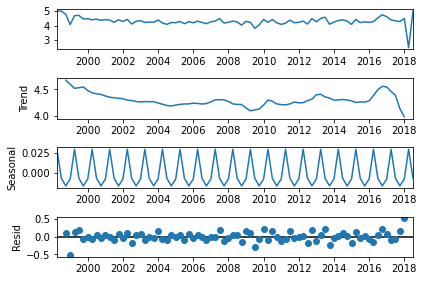

In [129]:
decomposition_qp=seasonal_decompose(r_qp,period=4)
decomposition_qp.plot();

In [130]:
fte=ExponentialSmoothing(r_qp,trend='add',seasonal='add',seasonal_periods=4).fit(smoothing_level=0.5,smoothing_trend=0.25,smoothing_seasonal=0.15)

In [131]:
forecasted_p=fte.fittedvalues

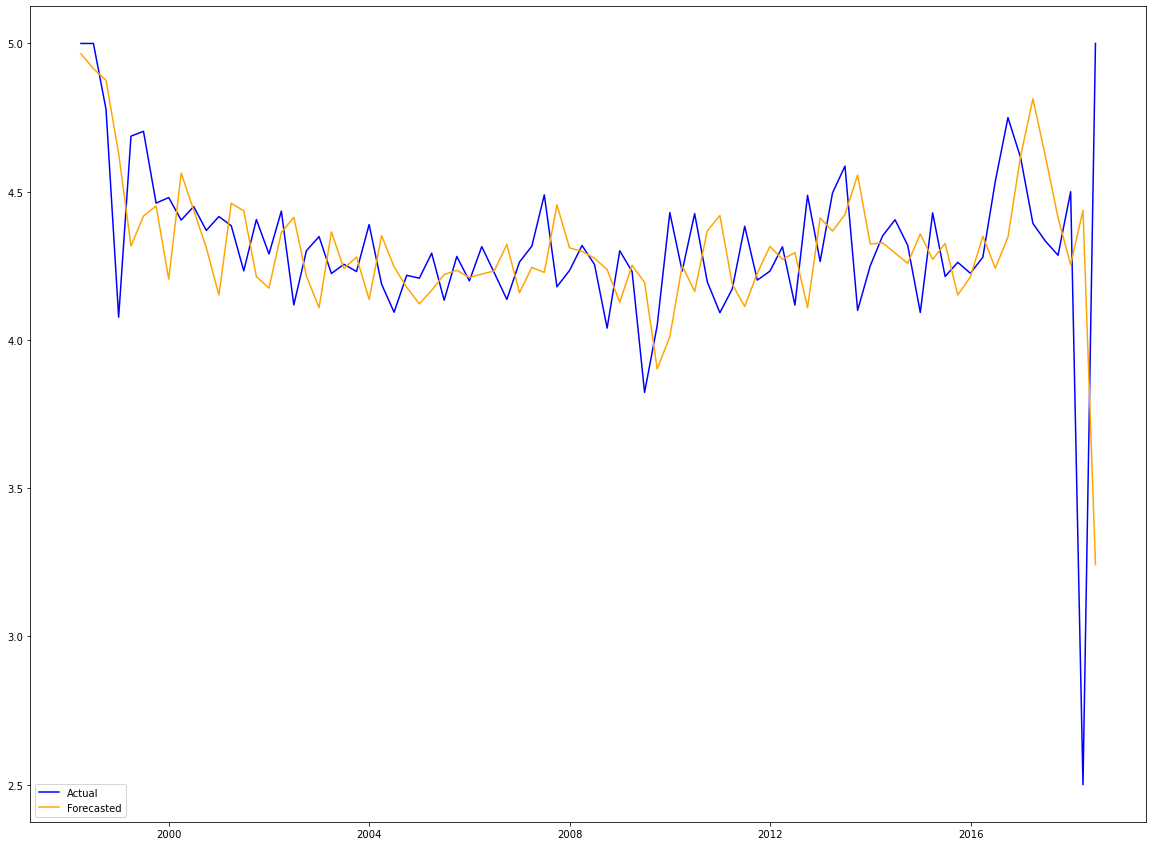

In [132]:
plt.figure(figsize=(20,15))
plt.plot(r_qp,color='blue',label='Actual')
plt.plot(forecasted_p,color='orange',label='Forecasted')
plt.legend()

In [133]:
stationary(forecasted_p)

'p_value=0.012082428100013889.Data is stationary'

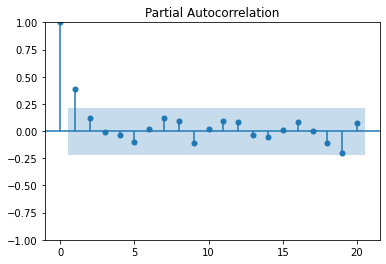

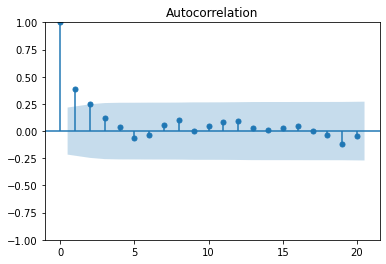

In [134]:
plot_pacf(forecasted_p,lags=20);
plot_acf(forecasted_p,lags=20);

In [135]:
arma=ARIMA(forecasted_p,order=(3,0,2)).fit()
print(arma.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   82
Model:                 ARIMA(3, 0, 2)   Log Likelihood                  24.390
Date:                Fri, 24 Mar 2023   AIC                            -34.779
Time:                        09:34:25   BIC                            -17.932
Sample:                    03-31-1998   HQIC                           -28.015
                         - 06-30-2018                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.2965      0.076     56.765      0.000       4.148       4.445
ar.L1          0.9371      0.130      7.211      0.000       0.682       1.192
ar.L2         -0.9642      0.198     -4.866      0.0

C:\Users\ganes\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [136]:
arma.forecast(10)

2018-09-30    3.745576
2018-12-31    3.935335
2019-03-31    3.889606
2019-06-30    3.950129
2019-09-30    4.158848
2019-12-31    4.270084
2020-03-31    4.207504
2020-06-30    4.160306
2020-09-30    4.239670
2020-12-31    4.323962
Freq: Q-DEC, Name: predicted_mean, dtype: float64

In [137]:
pvalue = sm.stats.acorr_ljungbox(arma.resid,lags=[1],return_df=True)['lb_pvalue'].values
print(pvalue)
if pvalue < 0.05:
    print("Reject H0. Bad model")
else:
    print("Fail-to-Reject H0. Good model")

[0.95870838]
Fail-to-Reject H0. Good model


In [138]:
split=int(0.7*len(forecasted_p))
train=forecasted_p.iloc[:split]
test=forecasted_p.iloc[split:]
print(len(train),len(test)) 

57 25


In [139]:
predictions=arma.predict(len(train),len(test+train)-1)
print(predictions)

reviewTime
2012-06-30    4.328246
2012-09-30    4.267735
2012-12-31    4.145858
2013-03-31    4.314348
2013-06-30    4.377930
2013-09-30    4.443479
2013-12-31    4.452151
2014-03-31    4.308788
2014-06-30    4.314982
2014-09-30    4.306551
2014-12-31    4.281836
2015-03-31    4.308550
2015-06-30    4.282200
2015-09-30    4.327533
2015-12-31    4.238035
2016-03-31    4.215309
2016-06-30    4.261264
2016-09-30    4.284991
2016-12-31    4.380832
2017-03-31    4.474539
2017-06-30    4.580170
2017-09-30    4.595092
2017-12-31    4.506331
2018-03-31    4.263091
2018-06-30    4.214434
Freq: Q-DEC, Name: predicted_mean, dtype: float64


In [140]:
actual = []; pred = []

for i in range(len(predictions)):
    actual.append(test[i])
    pred.append(predictions[i])

df_res = pd.DataFrame({'actual':actual, 'predicted':pred})
df_res['err'] = df_res.actual - df_res.predicted
print(df_res)

      actual  predicted       err
0   4.294555   4.328246 -0.033690
1   4.108838   4.267735 -0.158897
2   4.411492   4.145858  0.265634
3   4.367122   4.314348  0.052773
4   4.423104   4.377930  0.045174
5   4.556484   4.443479  0.113005
6   4.323663   4.452151 -0.128487
7   4.327438   4.308788  0.018650
8   4.293061   4.314982 -0.021921
9   4.258613   4.306551 -0.047938
10  4.357242   4.281836  0.075406
11  4.271704   4.308550 -0.036845
12  4.325575   4.282200  0.043374
13  4.151827   4.327533 -0.175706
14  4.212685   4.238035 -0.025350
15  4.349729   4.215309  0.134420
16  4.242169   4.261264 -0.019096
17  4.347203   4.284991  0.062212
18  4.619506   4.380832  0.238674
19  4.813581   4.474539  0.339042
20  4.619556   4.580170  0.039387
21  4.412560   4.595092 -0.182532
22  4.254265   4.506331 -0.252066
23  4.437271   4.263091  0.174180
24  3.242072   4.214434 -0.972362


<AxesSubplot:>

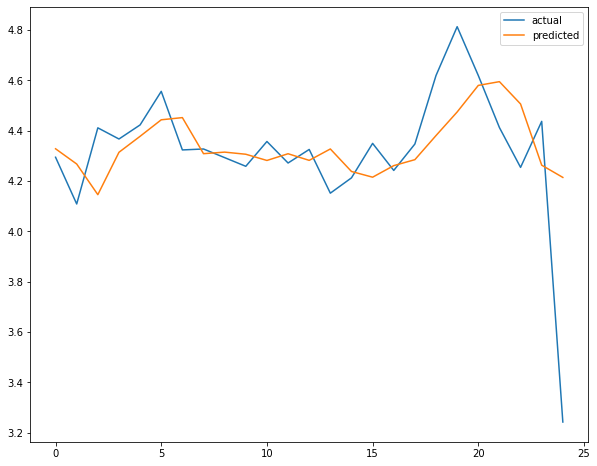

In [141]:
df_res.actual.plot(figsize=(10,8),legend=True)
df_res.predicted.plot(legend=True)

In [142]:
from sklearn.metrics import mean_squared_error
mse_p=mean_squared_error(df_res.actual,df_res.predicted)
rmse_p=mean_squared_error(df_res.actual,df_res.predicted,squared=False)
print('MSE:',mse_p)
print('RMSE:',rmse_p)

MSE: 0.05772275011118966
RMSE: 0.24025559329844884


In [143]:
f=pd.DataFrame(forecasted_p[-1:])
f.columns=['overall']
f

,overall
reviewTime,
2018-06-30,3.242072


In [144]:
arf=pd.DataFrame(arma.forecast(10))
arf.columns=['overall']
forecast=pd.concat([f,arf],axis=0)

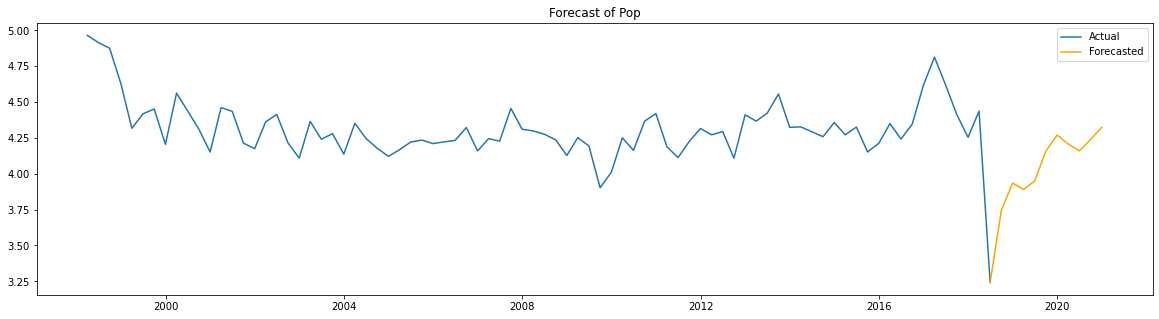

In [145]:
plt.figure(figsize=(20,5))
plt.plot(forecasted_p,label='Actual');
plt.plot(forecast['overall'],label='Forecasted',color='orange');
plt.title('Forecast of Pop');
plt.legend()

### rock

In [146]:
r_qr=p_r.resample('q').mean()

In [147]:
stationary(r_qr)

'p_value=0.07442085955087555.Data is not stationary'

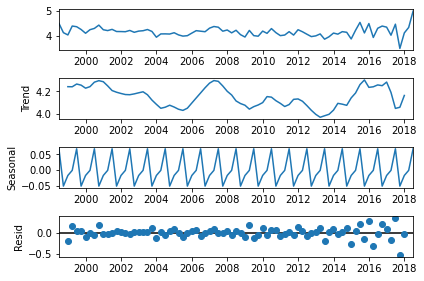

In [148]:
seasonal_decompose(r_qr).plot();

In [149]:
diff_r=r_qr-r_qr.shift()

In [150]:
diff_r.dropna(inplace=True)

In [151]:
stationary(diff_r)

'p_value=0.0031678142584445857.Data is stationary'

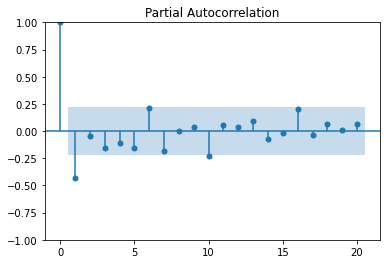

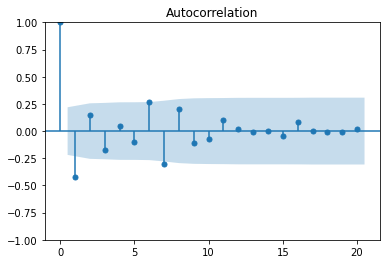

In [152]:
plot_pacf(diff_r,lags=20);
plot_acf(diff_r,lags=20);

In [153]:
m=[1,2]
for i in m:
    arima=ARIMA(r_qr,order=(1,1,i)).fit()
    print(i,arima.aic)
    

1 -30.047353650502778
2 -31.52429533691098


In [154]:
p=1;q=1;d=1
for i in range(1,3):
    for j in range(1,3):
        sarima=sm.tsa.statespace.SARIMAX(r_qr,order=(p,d,q),seasonal_order=(i,1,j,4)).fit()
        print(sarima.summary())

                                     SARIMAX Results                                     
Dep. Variable:                           overall   No. Observations:                   81
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 4)   Log Likelihood                  15.892
Date:                           Fri, 24 Mar 2023   AIC                            -21.785
Time:                                   09:34:26   BIC                            -10.131
Sample:                               06-30-1998   HQIC                           -17.127
                                    - 06-30-2018                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2280      0.204      1.116      0.264      -0.172       0.628
ma.L1         -0.9301      0.083    -11.223

C:\Users\ganes\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                       SARIMAX Results                                        
Dep. Variable:                                overall   No. Observations:                   81
Model:             SARIMAX(1, 1, 1)x(1, 1, [1, 2], 4)   Log Likelihood                  15.840
Date:                                Fri, 24 Mar 2023   AIC                            -19.681
Time:                                        09:34:26   BIC                             -5.696
Sample:                                    06-30-1998   HQIC                           -14.092
                                         - 06-30-2018                                         
Covariance Type:                                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2262      0.212      1.069      0.285      -0.188       0.641
ma.

C:\Users\ganes\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [155]:
sarima=sm.tsa.statespace.SARIMAX(r_qr,order=(1,1,1),seasonal_order=(2,1,2,4)).fit()
print(sarima.summary())

                                       SARIMAX Results                                        
Dep. Variable:                                overall   No. Observations:                   81
Model:             SARIMAX(1, 1, 1)x(2, 1, [1, 2], 4)   Log Likelihood                  16.190
Date:                                Fri, 24 Mar 2023   AIC                            -18.379
Time:                                        09:34:27   BIC                             -2.064
Sample:                                    06-30-1998   HQIC                           -11.859
                                         - 06-30-2018                                         
Covariance Type:                                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1809      0.215      0.842      0.400      -0.240       0.602
ma.

C:\Users\ganes\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [156]:
sarima.forecast(10)

2018-09-30    4.198644
2018-12-31    4.336794
2019-03-31    4.202975
2019-06-30    4.616588
2019-09-30    4.194117
2019-12-31    4.382391
2020-03-31    4.213293
2020-06-30    4.666015
2020-09-30    4.100695
2020-12-31    4.378864
Freq: Q-DEC, Name: predicted_mean, dtype: float64

In [157]:
split=int(0.7*len(r_qr))
train=r_qr.iloc[:split]
test=r_qr.iloc[split:]
print(len(train),len(test))

56 25


In [158]:
predictions_r=sarima.predict(len(train),len(test+train)-1)
print(predictions_r)

reviewTime
2012-06-30    4.146360
2012-09-30    4.002297
2012-12-31    4.083947
2013-03-31    4.066551
2013-06-30    4.110600
2013-09-30    3.926306
2013-12-31    4.009990
2014-03-31    4.048852
2014-06-30    4.034405
2014-09-30    3.990945
2014-12-31    4.108837
2015-03-31    4.004482
2015-06-30    4.077854
2015-09-30    4.118419
2015-12-31    4.057304
2016-03-31    4.244217
2016-06-30    4.125467
2016-09-30    4.096094
2016-12-31    4.260365
2017-03-31    4.166146
2017-06-30    4.243738
2017-09-30    4.260481
2017-12-31    4.041680
2018-03-31    4.081380
2018-06-30    4.429266
Freq: Q-DEC, Name: predicted_mean, dtype: float64


In [159]:
actual1 = []; pred1 = []
test_s=test.squeeze()

for i in range(len(predictions_r)):
    actual1.append(test_s[i])
    pred1.append(predictions_r[i])

df_res1 = pd.DataFrame({'actual':actual1, 'predicted':pred1})
df_res1['err'] = df_res1.actual - df_res1.predicted
print(df_res1)

      actual  predicted       err
0   4.057971   4.146360 -0.088389
1   3.960630   4.002297 -0.041667
2   3.990521   4.083947 -0.093426
3   4.069565   4.066551  0.003015
4   3.854772   4.110600 -0.255828
5   3.954545   3.926306  0.028240
6   4.104478   4.009990  0.094488
7   4.060976   4.048852  0.012123
8   4.162162   4.034405  0.127757
9   4.135714   3.990945  0.144770
10  3.864198   4.108837 -0.244640
11  4.218182   4.004482  0.213700
12  4.539326   4.077854  0.461472
13  4.110000   4.118419 -0.008419
14  4.492958   4.057304  0.435654
15  3.925000   4.244217 -0.319217
16  4.300000   4.125467  0.174533
17  4.390625   4.096094  0.294531
18  4.346154   4.260365  0.085789
19  4.017544   4.166146 -0.148602
20  4.466667   4.243738  0.222928
21  3.478261   4.260481 -0.782220
22  4.111111   4.041680  0.069431
23  4.333333   4.081380  0.251953
24  5.000000   4.429266  0.570734


<AxesSubplot:>

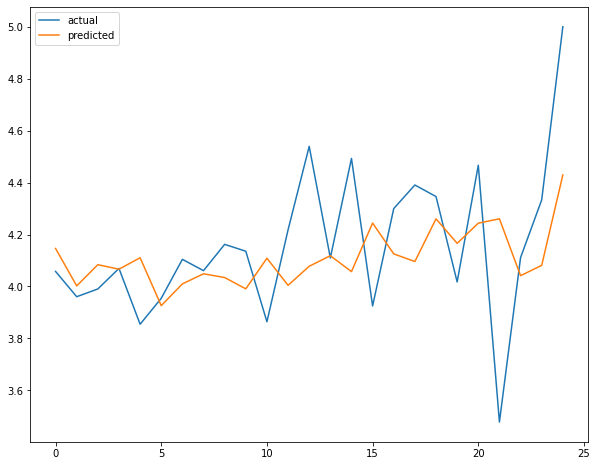

In [160]:
df_res1.actual.plot(figsize=(10,8),legend=True)
df_res1.predicted.plot(legend=True)

In [161]:
mse_r=mean_squared_error(df_res1.actual,df_res1.predicted)
rmse_r=mean_squared_error(df_res1.actual,df_res1.predicted,squared=False)
print('MSE:',mse_r)
print('RMSE:',rmse_r)

MSE: 0.07773526217963857
RMSE: 0.2788104413031165


In [162]:
pvalue = sm.stats.acorr_ljungbox(sarima.resid,lags=[1],return_df=True)['lb_pvalue'].values
print(pvalue)
if pvalue < 0.05:
    print("Reject H0. Bad model")
else:
    print("Fail-to-Reject H0. Good model")

[0.31527891]
Fail-to-Reject H0. Good model


In [163]:
o=pd.DataFrame(r_qr[-2:])
o

,overall
reviewTime,
2018-03-31,4.333333
2018-06-30,5.000000


In [164]:
o_o=pd.DataFrame(sarima.forecast(10))
o_o.columns=['overall']
os=pd.concat([o,o_o],axis=0)

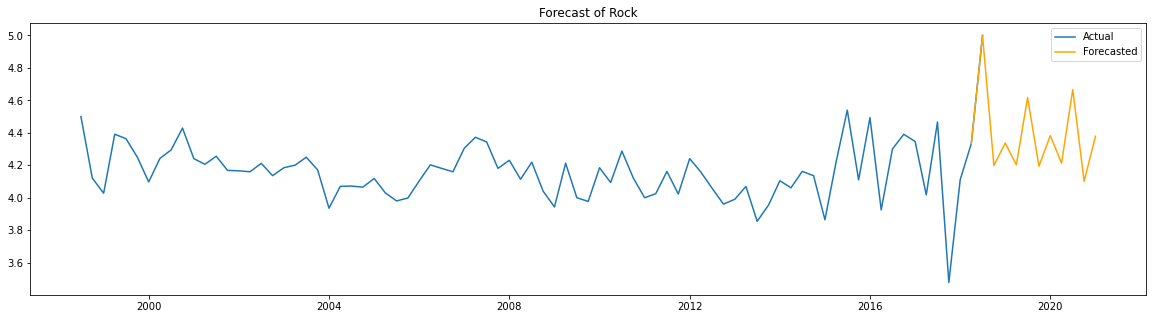

In [165]:
plt.figure(figsize=(20,5))
plt.plot(r_qr,label='Actual')
plt.plot(os['overall'],color='orange',label='Forecasted')
plt.title('Forecast of Rock')
plt.legend()

### Jazz

In [166]:
r_qj=p_j.resample('q').mean()

In [167]:
stationary(r_qj)

'p_value=2.0895660512596104e-08.Data is stationary'

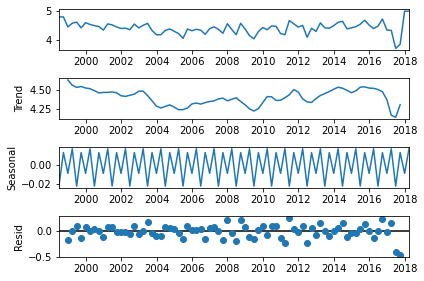

In [168]:
seasonal_decompose(r_qj).plot();

In [169]:
ftj=ExponentialSmoothing(r_qj,trend='add',seasonal='add',seasonal_periods=4).fit(smoothing_level=0.5,smoothing_trend=0.25,smoothing_seasonal=0.15)

In [170]:
forecasted_j=ftj.fittedvalues

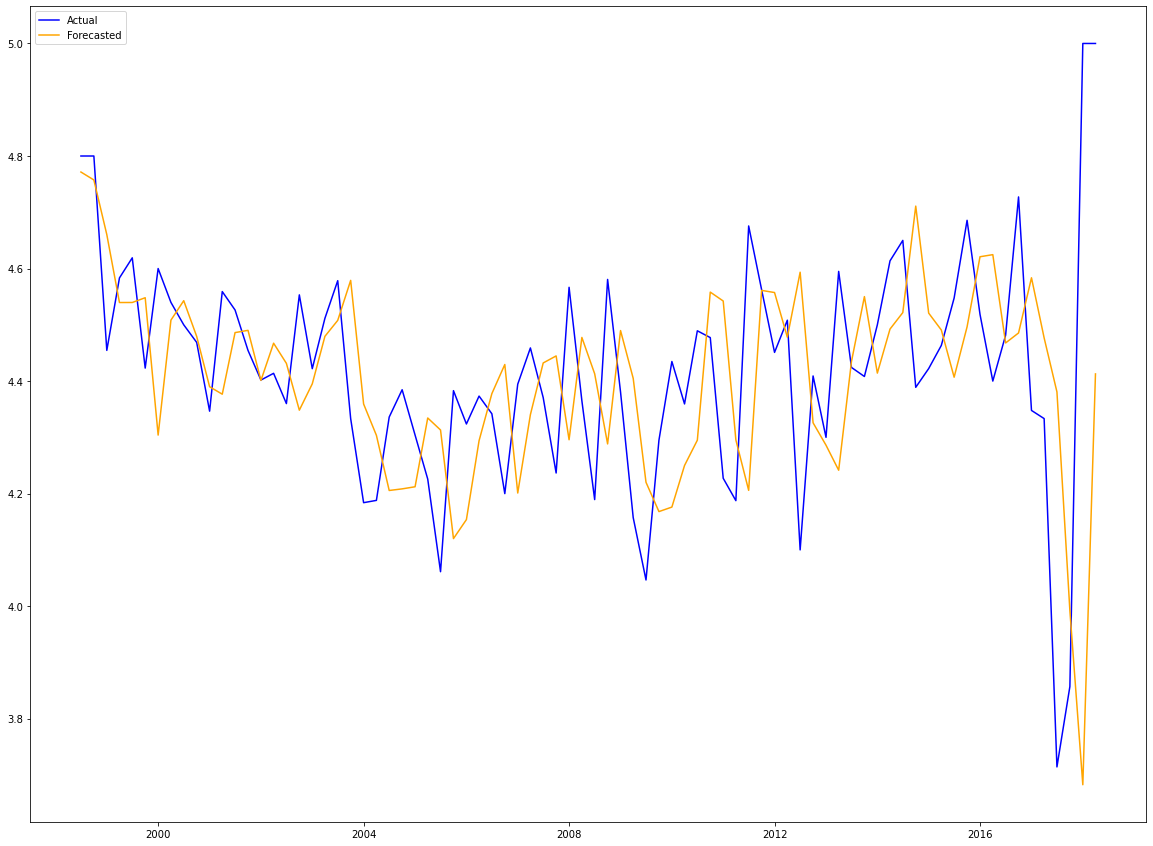

In [171]:
plt.figure(figsize=(20,15))
plt.plot(r_qj,color='blue',label='Actual')
plt.plot(forecasted_j,color='orange',label='Forecasted')
plt.legend()

In [172]:
stationary(forecasted_j)

'p_value=7.512836045526874e-06.Data is stationary'

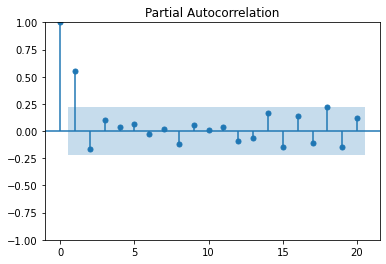

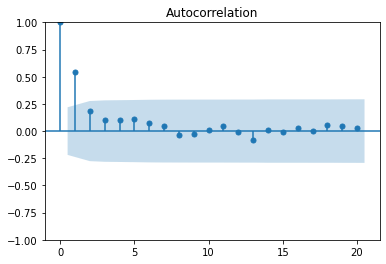

In [173]:
plot_pacf(forecasted_j,lags=20);
plot_acf(forecasted_j,lags=20);

In [174]:
arma1=ARIMA(forecasted_j,order=(4,0,3)).fit()
print(arma1.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   80
Model:                 ARIMA(4, 0, 3)   Log Likelihood                  46.297
Date:                Fri, 24 Mar 2023   AIC                            -74.595
Time:                        09:34:29   BIC                            -53.156
Sample:                    06-30-1998   HQIC                           -65.999
                         - 03-31-2018                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.4146      0.044    100.803      0.000       4.329       4.500
ar.L1          0.7080      1.206      0.587      0.557      -1.655       3.071
ar.L2         -0.1705      1.460     -0.117      0.9

C:\Users\ganes\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [175]:
arma1.forecast(11)

2018-06-30    4.592513
2018-09-30    4.418642
2018-12-31    4.300785
2019-03-31    4.289513
2019-06-30    4.391800
2019-09-30    4.448600
2019-12-31    4.442767
2020-03-31    4.401037
2020-06-30    4.385859
2020-09-30    4.398758
2020-12-31    4.419092
Freq: Q-DEC, Name: predicted_mean, dtype: float64

In [176]:
pvalue = sm.stats.acorr_ljungbox(arma1.resid,lags=[1],return_df=True)['lb_pvalue'].values
print(pvalue)
if pvalue < 0.05:
    print("Reject H0. Bad model")
else:
    print("Fail-to-Reject H0. Good model")

[0.91086869]
Fail-to-Reject H0. Good model


In [177]:
split=int(0.7*len(forecasted_j))
train=forecasted_j.iloc[:split]
test=forecasted_j.iloc[split:]
print(len(train),len(test))

56 24


In [178]:
predictions_j=arma1.predict(len(train),len(test+train)-1)
print(predictions_j)

reviewTime
2012-06-30    4.418742
2012-09-30    4.519663
2012-12-31    4.323937
2013-03-31    4.391377
2013-06-30    4.332170
2013-09-30    4.479585
2013-12-31    4.457291
2014-03-31    4.358115
2014-06-30    4.470380
2014-09-30    4.480849
2014-12-31    4.619994
2015-03-31    4.411774
2015-06-30    4.488539
2015-09-30    4.407714
2015-12-31    4.519657
2016-03-31    4.533022
2016-06-30    4.516819
2016-09-30    4.402035
2016-12-31    4.494132
2017-03-31    4.539179
2017-06-30    4.435882
2017-09-30    4.392281
2017-12-31    4.137373
2018-03-31    4.034305
Freq: Q-DEC, Name: predicted_mean, dtype: float64


In [179]:
actual2 = []; pred2 = []

for i in range(len(predictions_j)):
    actual2.append(test[i])
    pred2.append(predictions_j[i])

df_res2 = pd.DataFrame({'actual':actual2, 'predicted':pred2})
df_res2['err'] = df_res2.actual - df_res2.predicted
print(df_res2)

      actual  predicted       err
0   4.593471   4.418742  0.174730
1   4.325856   4.519663 -0.193807
2   4.286028   4.323937 -0.037910
3   4.241572   4.391377 -0.149805
4   4.434717   4.332170  0.102546
5   4.550118   4.479585  0.070533
6   4.414169   4.457291 -0.043123
7   4.492398   4.358115  0.134282
8   4.521733   4.470380  0.051353
9   4.710956   4.480849  0.230107
10  4.520777   4.619994 -0.099217
11  4.490734   4.411774  0.078960
12  4.406886   4.488539 -0.081653
13  4.496391   4.407714  0.088677
14  4.620957   4.519657  0.101299
15  4.624695   4.533022  0.091673
16  4.467732   4.516819 -0.049087
17  4.485526   4.402035  0.083491
18  4.583585   4.494132  0.089453
19  4.476705   4.539179 -0.062475
20  4.380716   4.435882 -0.055166
21  3.992143   4.392281 -0.400138
22  3.682632   4.137373 -0.454741
23  4.412744   4.034305  0.378439


<AxesSubplot:>

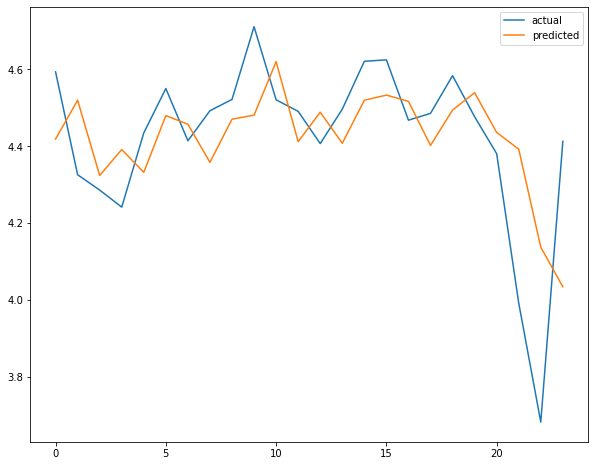

In [180]:
df_res2.actual.plot(figsize=(10,8),legend=True)
df_res2.predicted.plot(legend=True)

In [181]:
mse_j=mean_squared_error(df_res2.actual,df_res2.predicted)
rmse_j=mean_squared_error(df_res2.actual,df_res2.predicted,squared=False)
print('MSE:',mse_j)
print('RMSE:',rmse_j)

MSE: 0.031944070710779204
RMSE: 0.17872904271768258


In [182]:
j=pd.DataFrame(forecasted_j[-1:])
j.columns=['overall']
j

,overall
reviewTime,
2018-03-31,4.412744


In [183]:
arj=pd.DataFrame(arma1.forecast(10))
arj.columns=['overall']
forecastj=pd.concat([j,arj],axis=0)

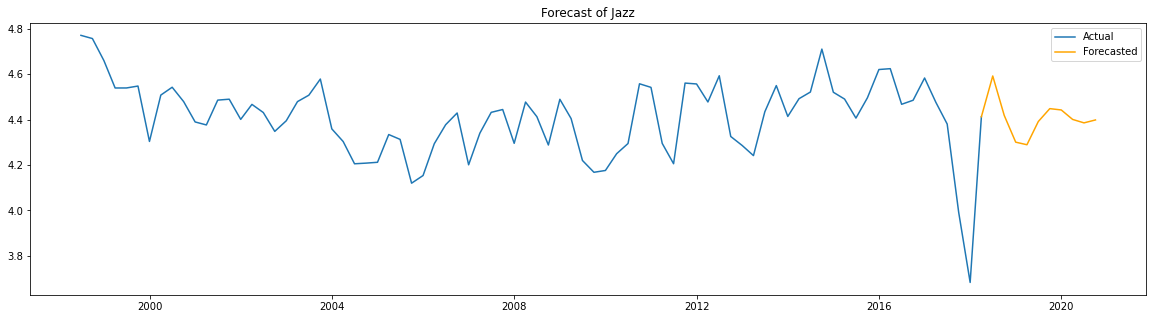

In [184]:
plt.figure(figsize=(20,5))
plt.plot(forecasted_j,label='Actual');
plt.plot(forecastj['overall'],label='Forecasted',color='orange');
plt.title('Forecast of Jazz');
plt.legend()

### Country

In [185]:
r_qc=p_c.resample('q').mean()

In [186]:
stationary(r_qc)

'p_value=0.03398491417359106.Data is stationary'

In [187]:
ftc=ExponentialSmoothing(r_qc,trend='add',seasonal='add',seasonal_periods=4).fit(smoothing_level=0.5,smoothing_trend=0.25,smoothing_seasonal=0.15)

In [188]:
forecasted_c=ftc.fittedvalues

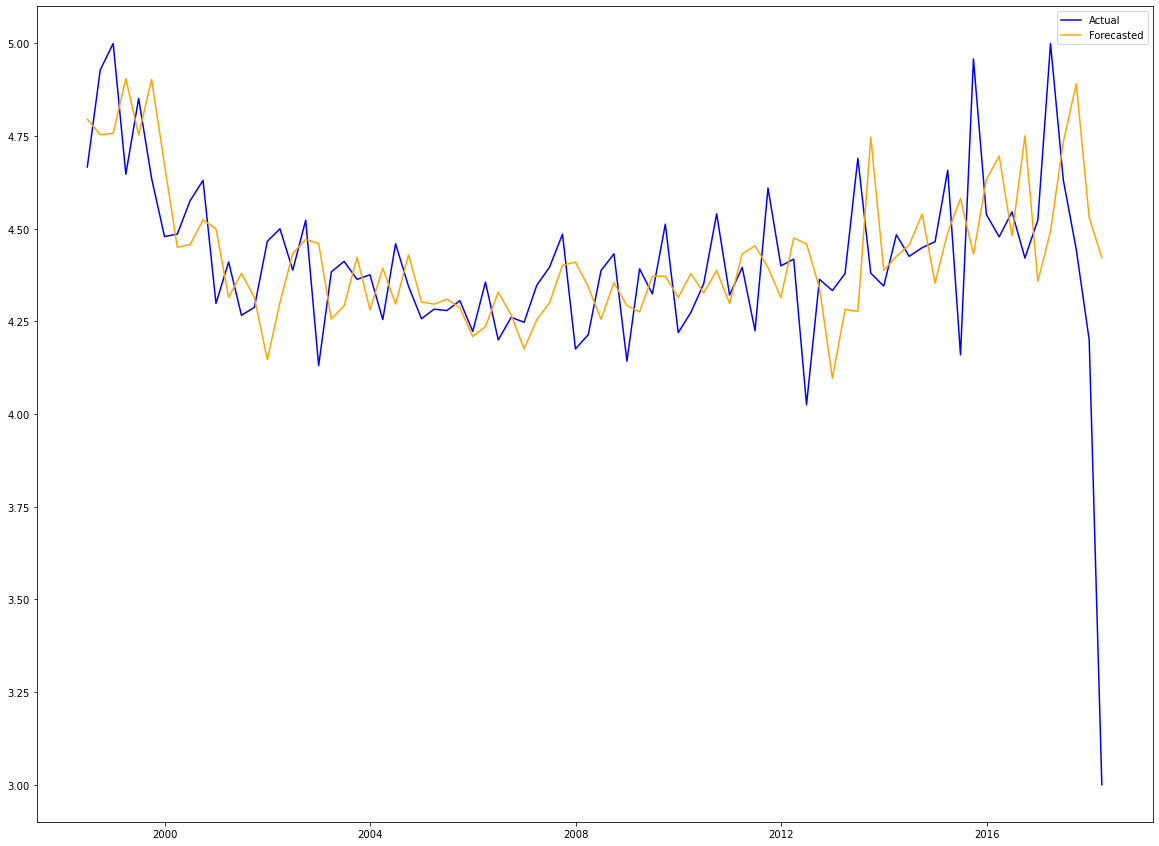

In [189]:
plt.figure(figsize=(20,15))
plt.plot(r_qc,color='blue',label='Actual')
plt.plot(forecasted_c,color='orange',label='Forecasted')
plt.legend()

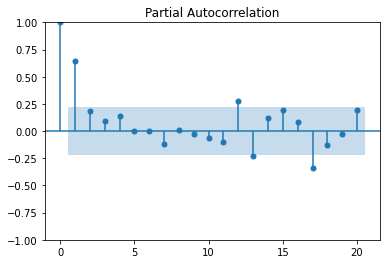

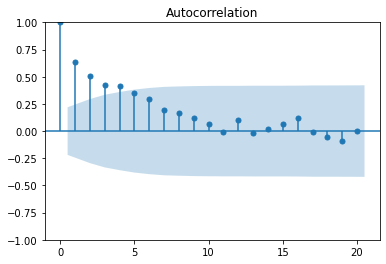

In [190]:
plot_pacf(forecasted_c,lags=20);
plot_acf(forecasted_c,lags=20);

In [191]:
z=[1,2,3]
y=[1,2,3,4]
for i in y:
    for j in z:
        arma2=ARIMA(forecasted_c,order=(i,0,j)).fit()
        print(i,j,arma2.aic)

1 1 -92.51156913020807
1 2 -91.29015176620396
1 3 -89.34456870980776
2 1 -91.16872366649682
2 2 -89.2987636096748
2 3 -91.7160767441656


C:\Users\ganes\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


3 1 -89.642442362498
3 2 -90.58143570250513


C:\Users\ganes\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ganes\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


3 3 -91.08568523201879
4 1 -89.64149429048643


C:\Users\ganes\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


4 2 -90.78658330937179
4 3 -92.12489049641957


C:\Users\ganes\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [192]:
arma2=ARIMA(forecasted_c,order=(4,0,4)).fit()
print(arma2.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   80
Model:                 ARIMA(4, 0, 4)   Log Likelihood                  55.252
Date:                Fri, 24 Mar 2023   AIC                            -90.503
Time:                        09:34:31   BIC                            -66.683
Sample:                    06-30-1998   HQIC                           -80.953
                         - 03-31-2018                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.4449      0.057     77.723      0.000       4.333       4.557
ar.L1          0.9542      0.250      3.819      0.000       0.464       1.444
ar.L2          0.4542      0.198      2.293      0.0

C:\Users\ganes\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [193]:
arma2.forecast(10)

2018-06-30    4.430192
2018-09-30    4.538945
2018-12-31    4.460922
2019-03-31    4.486777
2019-06-30    4.388520
2019-09-30    4.434077
2019-12-31    4.372556
2020-03-31    4.447319
2020-06-30    4.401251
2020-09-30    4.474516
Freq: Q-DEC, Name: predicted_mean, dtype: float64

In [194]:
split=int(0.7*len(forecasted_c))
train=forecasted_c.iloc[:split]
test=forecasted_c.iloc[split:]
print(len(train),len(test))

56 24


In [195]:
predictions_c=arma2.predict(len(train),len(test+train)-1)
print(predictions_c)

reviewTime
2012-06-30    4.394623
2012-09-30    4.412202
2012-12-31    4.328346
2013-03-31    4.289472
2013-06-30    4.360462
2013-09-30    4.371946
2013-12-31    4.513656
2014-03-31    4.364678
2014-06-30    4.362684
2014-09-30    4.510703
2014-12-31    4.486786
2015-03-31    4.508612
2015-06-30    4.491612
2015-09-30    4.599145
2015-12-31    4.388352
2016-03-31    4.565913
2016-06-30    4.494195
2016-09-30    4.480595
2016-12-31    4.602150
2017-03-31    4.512223
2017-06-30    4.543085
2017-09-30    4.734524
2017-12-31    4.655656
2018-03-31    4.553884
Freq: Q-DEC, Name: predicted_mean, dtype: float64


In [196]:
actual3 = []; pred3 = []

for i in range(len(predictions_c)):
    actual3.append(test[i])
    pred3.append(predictions_c[i])

df_res3 = pd.DataFrame({'actual':actual3, 'predicted':pred3})
df_res3['err'] = df_res3.actual - df_res3.predicted
print(df_res3)

      actual  predicted       err
0   4.459505   4.394623  0.064882
1   4.340994   4.412202 -0.071208
2   4.096510   4.328346 -0.231836
3   4.282455   4.289472 -0.007016
4   4.277345   4.360462 -0.083117
5   4.747196   4.371946  0.375250
6   4.387506   4.513656 -0.126150
7   4.425604   4.364678  0.060926
8   4.456353   4.362684  0.093669
9   4.539749   4.510703  0.029046
10  4.353689   4.486786 -0.133097
11  4.489587   4.508612 -0.019024
12  4.581761   4.491612  0.090150
13  4.431595   4.599145 -0.167550
14  4.632707   4.388352  0.244355
15  4.696681   4.565913  0.130768
16  4.481020   4.494195 -0.013176
17  4.751040   4.480595  0.270445
18  4.358365   4.602150 -0.243786
19  4.493741   4.512223 -0.018481
20  4.733617   4.543085  0.190532
21  4.891197   4.734524  0.156673
22  4.529818   4.655656 -0.125838
23  4.422142   4.553884 -0.131742


<AxesSubplot:>

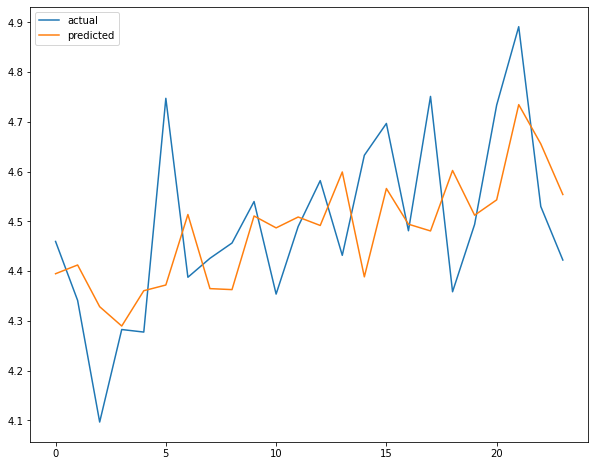

In [197]:
df_res3.actual.plot(figsize=(10,8),legend=True)
df_res3.predicted.plot(legend=True)

In [198]:
mse_c=mean_squared_error(df_res3.actual,df_res3.predicted)
rmse_c=mean_squared_error(df_res3.actual,df_res3.predicted,squared=False)
print('MSE:',mse_c)
print('RMSE:',rmse_c)

MSE: 0.024927326397411576
RMSE: 0.1578839016410843


In [199]:
co=pd.DataFrame(forecasted_c[-1:])
co.columns=['overall']
co

,overall
reviewTime,
2018-03-31,4.422142


In [200]:
arc=pd.DataFrame(arma2.forecast(10))
arc.columns=['overall']
forecastco=pd.concat([co,arc],axis=0)

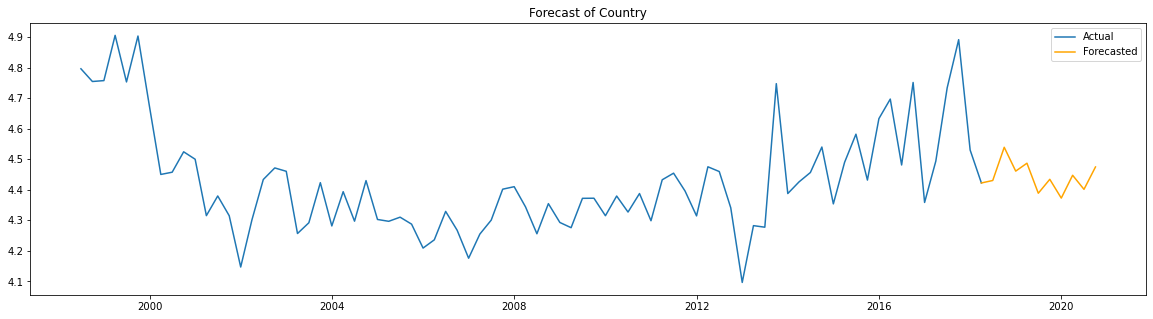

In [201]:
plt.figure(figsize=(20,5))
plt.plot(forecasted_c,label='Actual');
plt.plot(forecastco['overall'],label='Forecasted',color='orange');
plt.title('Forecast of Country');
plt.legend()

### Blues

In [202]:
r_qb=p_b.resample('q').mean()

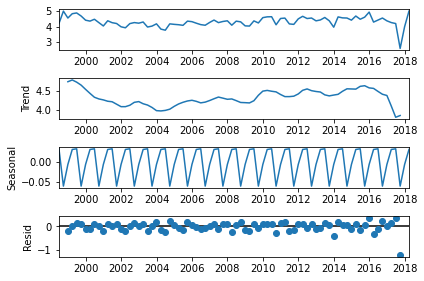

In [203]:
seasonal_decompose(r_qb).plot();

In [204]:
stationary(r_qb)

'p_value=0.0338094197208287.Data is stationary'

In [205]:
ftb=ExponentialSmoothing(r_qb,trend='add',seasonal='add',seasonal_periods=4).fit(smoothing_level=0.6,smoothing_trend=0.25,smoothing_seasonal=0.15)

In [206]:
forecasted_b=ftb.fittedvalues

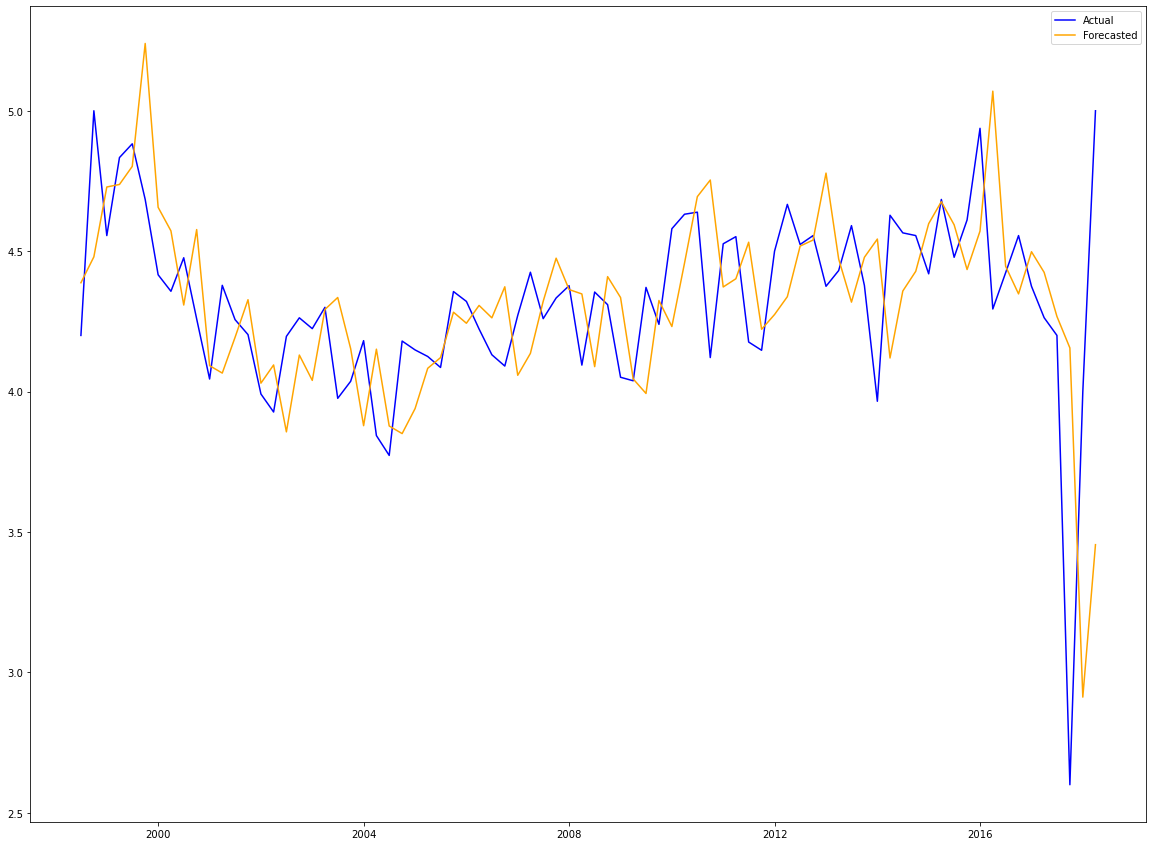

In [207]:
plt.figure(figsize=(20,15))
plt.plot(r_qb,color='blue',label='Actual')
plt.plot(forecasted_b,color='orange',label='Forecasted')
plt.legend()

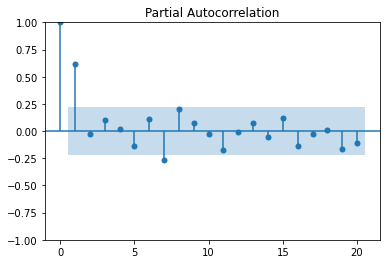

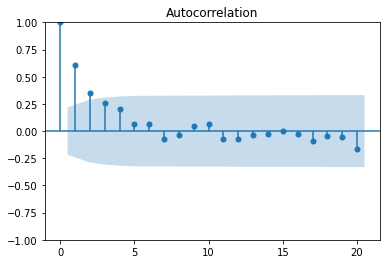

In [208]:
plot_pacf(forecasted_b,lags=20);
plot_acf(forecasted_b,lags=20);

In [209]:
z=[1,2]
for i in z:
    for j in z:
        arma3=ARIMA(forecasted_b,order=(i,0,j)).fit()
        print(i,j,arma3.aic)

1 1 11.219564264838041
1 2 13.216644067392748
2 1 13.217912734623035
2 2 12.65159343102735


C:\Users\ganes\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [210]:
arma3=ARIMA(forecasted_b,order=(4,0,3)).fit()
print(arma3.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   80
Model:                 ARIMA(4, 0, 3)   Log Likelihood                   2.787
Date:                Fri, 24 Mar 2023   AIC                             12.426
Time:                        09:34:33   BIC                             33.864
Sample:                    06-30-1998   HQIC                            21.021
                         - 03-31-2018                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.2908      0.160     26.757      0.000       3.976       4.605
ar.L1          0.5649      0.211      2.680      0.007       0.152       0.978
ar.L2          0.1319      0.154      0.859      0.3

C:\Users\ganes\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [211]:
arma3.forecast(10)

2018-06-30    3.635024
2018-09-30    3.720665
2018-12-31    3.665927
2019-03-31    3.872023
2019-06-30    4.024182
2019-09-30    4.234880
2019-12-31    4.173336
2020-03-31    4.171735
2020-06-30    4.087200
2020-09-30    4.220173
Freq: Q-DEC, Name: predicted_mean, dtype: float64

In [212]:
split=int(0.7*len(forecasted_b))
train=forecasted_b.iloc[:split]
test=forecasted_b.iloc[split:]
print(len(train),len(test))

56 24


In [213]:
predictions_b=arma3.predict(len(train),len(test+train)-1)
print(predictions_b)

reviewTime
2012-06-30    4.285255
2012-09-30    4.590976
2012-12-31    4.500065
2013-03-31    4.668243
2013-06-30    4.349657
2013-09-30    4.356566
2013-12-31    4.369413
2014-03-31    4.519961
2014-06-30    4.209475
2014-09-30    4.384080
2014-12-31    4.289389
2015-03-31    4.465572
2015-06-30    4.525085
2015-09-30    4.648601
2015-12-31    4.494147
2016-03-31    4.528710
2016-06-30    4.636692
2016-09-30    4.421194
2016-12-31    4.408982
2017-03-31    4.591153
2017-06-30    4.373729
2017-09-30    4.247895
2017-12-31    4.070508
2018-03-31    3.489307
Freq: Q-DEC, Name: predicted_mean, dtype: float64


In [214]:
actual4 = []; pred4 = []

for i in range(len(predictions_b)):
    actual4.append(test[i])
    pred4.append(predictions_b[i])

df_res4 = pd.DataFrame({'actual':actual4, 'predicted':pred4})
df_res4['err'] = df_res4.actual - df_res4.predicted
print(df_res4)

      actual  predicted       err
0   4.518162   4.285255  0.232906
1   4.539665   4.590976 -0.051311
2   4.778023   4.500065  0.277958
3   4.471951   4.668243 -0.196293
4   4.318566   4.349657 -0.031091
5   4.478267   4.356566  0.121701
6   4.543147   4.369413  0.173734
7   4.119623   4.519961 -0.400338
8   4.358124   4.209475  0.148648
9   4.428339   4.384080  0.044259
10  4.598016   4.289389  0.308627
11  4.676350   4.465572  0.210778
12  4.593945   4.525085  0.068860
13  4.434622   4.648601 -0.213979
14  4.571482   4.494147  0.077335
15  5.069804   4.528710  0.541095
16  4.446410   4.636692 -0.190283
17  4.347847   4.421194 -0.073348
18  4.498074   4.408982  0.089092
19  4.424528   4.591153 -0.166625
20  4.267566   4.373729 -0.106163
21  4.155474   4.247895 -0.092420
22  2.912051   4.070508 -1.158456
23  3.454905   3.489307 -0.034402


<AxesSubplot:>

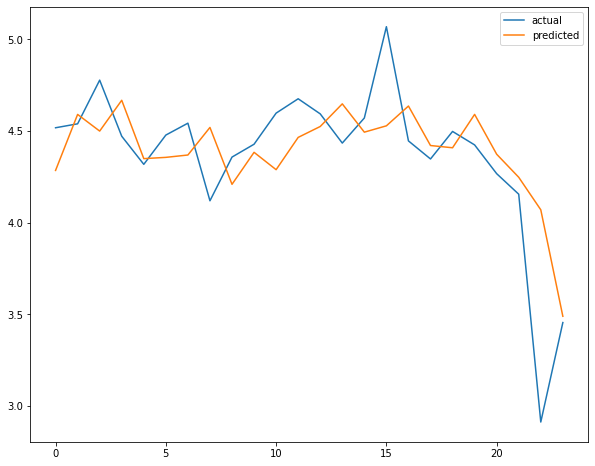

In [215]:
df_res4.actual.plot(figsize=(10,8),legend=True)
df_res4.predicted.plot(legend=True)

In [216]:
mse_b=mean_squared_error(df_res4.actual,df_res4.predicted)
rmse_b=mean_squared_error(df_res4.actual,df_res4.predicted,squared=False)
print('MSE:',mse_b)
print('RMSE:',rmse_b)

MSE: 0.09717636766452202
RMSE: 0.31173124268273467


In [217]:
b=pd.DataFrame(forecasted_b[-1:])
b.columns=['overall']
b

,overall
reviewTime,
2018-03-31,3.454905


In [218]:
arb=pd.DataFrame(arma3.forecast(10))
arb.columns=['overall']
forecastb=pd.concat([b,arb],axis=0)

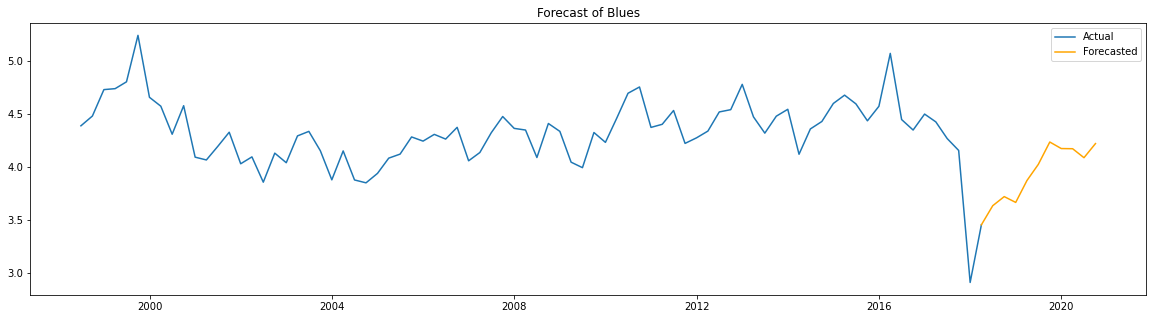

In [219]:
plt.figure(figsize=(20,5))
plt.plot(forecasted_b,label='Actual');
plt.plot(forecastb['overall'],label='Forecasted',color='orange');
plt.title('Forecast of Blues');
plt.legend()

### Metal

In [220]:
r_qm=p_m.resample('q').mean()

In [221]:
r_qm.drop('2018-03-31',axis=0,inplace=True)

In [222]:
stationary(r_qm)

'p_value=0.4083846452037046.Data is not stationary'

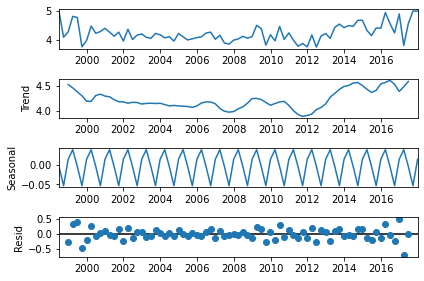

In [223]:
seasonal_decompose(r_qm).plot();

In [224]:
diff_m=r_qm-r_qm.shift()
diff_m.dropna(inplace=True)

In [225]:
stationary(diff_m)

'p_value=2.96156967705581e-08.Data is stationary'

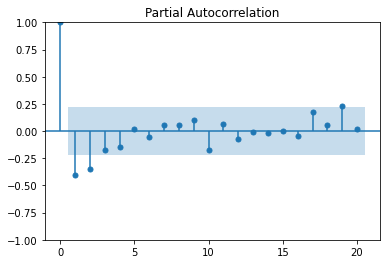

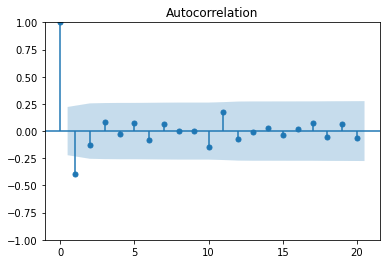

In [226]:
plot_pacf(diff_m,lags=20);
plot_acf(diff_m,lags=20);

In [227]:
m=[1,2]
for i in m:
    arima=ARIMA(r_qm,order=(i,1,1)).fit()
    print(i,arima.aic)
    

1 22.407458933616176
2 23.035128836557572


In [228]:
sarima2=sm.tsa.statespace.SARIMAX(r_qm,order=(1,1,1),seasonal_order=(2,1,2,4)).fit()
print(sarima2.summary())

                                       SARIMAX Results                                        
Dep. Variable:                                overall   No. Observations:                   79
Model:             SARIMAX(1, 1, 1)x(2, 1, [1, 2], 4)   Log Likelihood                 -12.868
Date:                                Fri, 24 Mar 2023   AIC                             39.735
Time:                                        09:34:34   BIC                             55.864
Sample:                                    06-30-1998   HQIC                            46.169
                                         - 12-31-2017                                         
Covariance Type:                                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0325      0.154      0.211      0.833      -0.269       0.334
ma.

In [229]:
pvalue = sm.stats.acorr_ljungbox(sarima2.resid,lags=[1],return_df=True)['lb_pvalue'].values
print(pvalue)
if pvalue < 0.05:
    print("Reject H0. Bad model")
else:
    print("Fail-to-Reject H0. Good model")

[0.1789422]
Fail-to-Reject H0. Good model


In [230]:
sarima2.forecast(10)

2018-03-31    4.617100
2018-06-30    4.677312
2018-09-30    4.766449
2018-12-31    4.918667
2019-03-31    4.629754
2019-06-30    4.744422
2019-09-30    4.866071
2019-12-31    4.988935
2020-03-31    4.747679
2020-06-30    4.827238
Freq: Q-DEC, Name: predicted_mean, dtype: float64

In [231]:
split=int(0.7*len(r_qm))
train=r_qm.iloc[:split]
test=r_qm.iloc[split:]
print(len(train),len(test))

55 24


In [232]:
predictions_m=sarima2.predict(len(train),len(test+train)-1)
print(predictions_m)

reviewTime
2012-03-31    3.968602
2012-06-30    4.052243
2012-09-30    3.815717
2012-12-31    3.970974
2013-03-31    4.094158
2013-06-30    3.972786
2013-09-30    4.040383
2013-12-31    4.210792
2014-03-31    4.280174
2014-06-30    4.331132
2014-09-30    4.369718
2014-12-31    4.466849
2015-03-31    4.525806
2015-06-30    4.500388
2015-09-30    4.486500
2015-12-31    4.496898
2016-03-31    4.435467
2016-06-30    4.505396
2016-09-30    4.618967
2016-12-31    4.557423
2017-03-31    4.699403
2017-06-30    4.390490
2017-09-30    4.465278
2017-12-31    4.729880
Freq: Q-DEC, Name: predicted_mean, dtype: float64


In [233]:
actual5 = []; pred5 = []
test_s=test.squeeze()

for i in range(len(predictions_m)):
    actual5.append(test_s[i])
    pred5.append(predictions_m[i])

df_res5 = pd.DataFrame({'actual':actual5, 'predicted':pred5})
df_res5['err'] = df_res5.actual - df_res5.predicted
print(df_res5)

      actual  predicted       err
0   4.178571   3.968602  0.209969
1   3.760870   4.052243 -0.291374
2   4.139535   3.815717  0.323818
3   4.229508   3.970974  0.258534
4   4.058824   4.094158 -0.035335
5   4.442308   3.972786  0.469521
6   4.550000   4.040383  0.509617
7   4.428571   4.210792  0.217779
8   4.500000   4.280174  0.219826
9   4.473684   4.331132  0.142552
10  4.680000   4.369718  0.310282
11  4.681818   4.466849  0.214969
12  4.333333   4.525806 -0.192473
13  4.153846   4.500388 -0.346541
14  4.416667   4.486500 -0.069833
15  4.409091   4.496898 -0.087807
16  4.950000   4.435467  0.514533
17  4.571429   4.505396  0.066033
18  4.250000   4.618967 -0.368967
19  4.900000   4.557423  0.342577
20  3.818182   4.699403 -0.881221
21  4.571429   4.390490  0.180939
22  5.000000   4.465278  0.534722
23  5.000000   4.729880  0.270120


<AxesSubplot:>

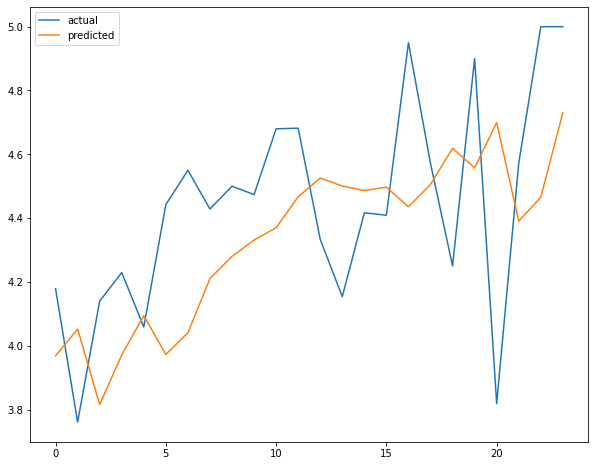

In [234]:
df_res5.actual.plot(figsize=(10,8),legend=True)
df_res5.predicted.plot(legend=True)

In [235]:
mse_m=mean_squared_error(df_res5.actual,df_res5.predicted)
rmse_m=mean_squared_error(df_res5.actual,df_res5.predicted,squared=False)
print('MSE:',mse_m)
print('RMSE:',rmse_m)

MSE: 0.12088150899689903
RMSE: 0.34768018205945966


In [236]:
m=pd.DataFrame(r_qm[-1:])
m

,overall
reviewTime,
2017-12-31,5.0


In [237]:
m_o=pd.DataFrame(sarima2.forecast(10))
m_o.columns=['overall']
ms=pd.concat([m,m_o],axis=0)

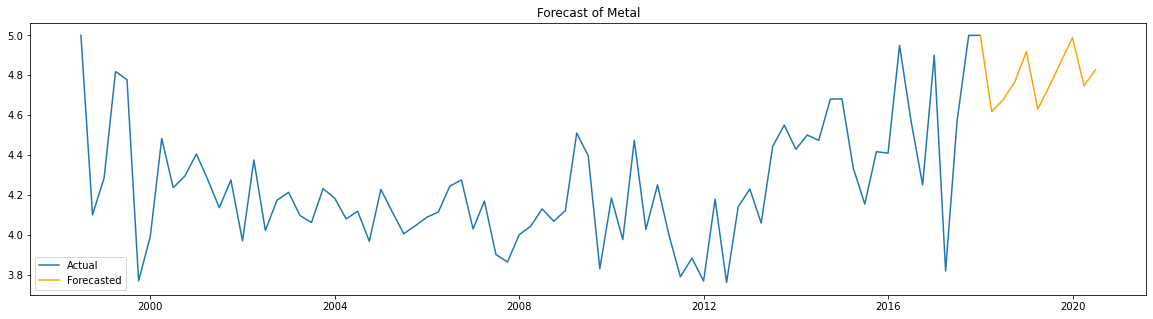

In [238]:
plt.figure(figsize=(20,5))
plt.plot(r_qm,label='Actual');
plt.plot(ms['overall'],label='Forecasted',color='orange');
plt.title('Forecast of Metal');
plt.legend()

In [239]:
dict={'Genre':['Pop','Rock','Jazz','Country','Blues','Metal'],'Model':['ARMA','SARIMA','ARMA','ARMA','ARMA','SARIMA'],'Mean_squared_error':[mse_p,mse_r,mse_j,mse_c,mse_b,mse_m],'Root_mean_squared_error':[rmse_p,rmse_r,rmse_j,rmse_c,rmse_b,rmse_m]}
compare=pd.DataFrame(dict)
compare

,Genre,Model,Mean_squared_error,Root_mean_squared_error
0,Pop,ARMA,0.057723,0.240256
1,Rock,SARIMA,0.077735,0.278810
2,Jazz,ARMA,0.031944,0.178729
3,Country,ARMA,0.024927,0.157884
4,Blues,ARMA,0.097176,0.311731
5,Metal,SARIMA,0.120882,0.347680


# MAGAZINE SUBSCRIPTION

In [240]:
df=pd.read_json("Magazine_Subscriptions.json",lines="True")

In [241]:
df1=pd.read_json("meta_Magazine_Subscriptions.json",lines="True")

In [242]:
combined=df.merge(df1,on='asin')
combined.head(3)

,overall,vote,verified,reviewTime,reviewerID,asin,reviewerName,reviewText,summary,unixReviewTime,style,image,category,tech1,description,fit,title,also_buy,tech2,brand,feature,rank,also_view,details,main_cat,similar_item,date,price,imageURL,imageURLHighRes
0,5,9,False,"11 8, 2001",AH2IFH762VY5U,B00005N7P0,ted sedlmayr,"for computer enthusiast, MaxPC is a welcome si...","AVID READER SINCE ""boot"" WAS THE NAME",1005177600,NaN,NaN,"[Magazine Subscriptions, Technology, Computers...",,[MAXIMUM PC is the ultimate upgrade for the sa...,,"<span class=""a-size-medium a-color-secondary""",[],,"Future US, Inc.",[],[],"[B078Y58XM8, B07K45HS6Q, B000AMXXF2, B07FMVJT1...","{'Format:': 'Print Magazine', 'Shipping: ': 'C...",Magazine Subscriptions,,NaT,,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...
1,5,9,False,"11 8, 2001",AH2IFH762VY5U,B00005N7P0,ted sedlmayr,"for computer enthusiast, MaxPC is a welcome si...","AVID READER SINCE ""boot"" WAS THE NAME",1005177600,NaN,NaN,"[Magazine Subscriptions, Technology, Computers...",,[MAXIMUM PC is the ultimate upgrade for the sa...,,"<span class=""a-size-medium a-color-secondary""",[],,"Future US, Inc.",[],[],"[B078Y58XM8, B07K45HS6Q, B000AMXXF2, B07FMVJT1...","{'Format:': 'Print Magazine', 'Shipping: ': 'C...",Magazine Subscriptions,,NaT,,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...
2,5,9,False,"10 31, 2001",AOSFI0JEYU4XM,B00005N7P0,Amazon Customer,Thank god this is not a Ziff Davis publication...,The straight scoop,1004486400,NaN,NaN,"[Magazine Subscriptions, Technology, Computers...",,[MAXIMUM PC is the ultimate upgrade for the sa...,,"<span class=""a-size-medium a-color-secondary""",[],,"Future US, Inc.",[],[],"[B078Y58XM8, B07K45HS6Q, B000AMXXF2, B07FMVJT1...","{'Format:': 'Print Magazine', 'Shipping: ': 'C...",Magazine Subscriptions,,NaT,,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...


In [243]:
import re
import nltk
from collections import Counter
from nltk.tokenize import sent_tokenize, word_tokenize 

In [244]:
def remaining(data):                                          
    a=re.sub("[\[\]\(\)\,\d\']","",str(data))
    return a

In [245]:
combined['category']=combined['category'].apply(remaining)

In [246]:
combined=combined.mask(combined=='')

In [247]:
combined.isnull().sum()

overall                 0
vote                98774
verified                0
reviewTime              0
reviewerID              0
asin                    0
reviewerName            4
reviewText             47
summary                33
unixReviewTime          0
style               50053
image              135586
category             6339
tech1              135793
description             0
fit                135793
title                   0
also_buy                0
tech2              135793
brand                2577
feature                 0
rank                    0
also_view               0
details                 0
main_cat                0
similar_item       135793
date               135793
price              134755
imageURL                0
imageURLHighRes         0
dtype: int64

In [248]:
combined[combined.category==''].index

Int64Index([], dtype='int64')

In [249]:
combined.drop(['vote','image','tech1','fit','tech2','similar_item','date','price','style'],axis=1, inplace=True)

In [250]:
combined.isnull().sum()

overall               0
verified              0
reviewTime            0
reviewerID            0
asin                  0
reviewerName          4
reviewText           47
summary              33
unixReviewTime        0
category           6339
description           0
title                 0
also_buy              0
brand              2577
feature               0
rank                  0
also_view             0
details               0
main_cat              0
imageURL              0
imageURLHighRes       0
dtype: int64

In [251]:
combined.dropna(inplace=True)

In [252]:
def extract_word(string, word_num):
    words = string.split()
    return words[word_num-1] if len(words) >= word_num else ""

In [253]:
combined['word'] = combined['category'].apply(lambda x: extract_word(x, 3))

In [254]:
combined['word'].unique()

array(['Technology', 'Home', 'Fashion', 'Arts', 'Travel', 'Sports',
       'Science', 'News', 'Professional', 'Entertainment', 'Business',
       'Literary', 'Crafts', 'Cooking', 'Automotive', 'Parenting',
       'Children', '"Mens', 'Health', '"Womens', 'Religion',
       'Newsletters', 'Pets', 'Lifestyle', 'Spanish-Language',
       'Newspapers'], dtype=object)

In [255]:
def conversion(string):
    string=re.sub(r'(Business|Professional|News|Newsletters|Newspapers|Literary)','Professional',string)
    string=re.sub(r'(Sports|Travel|Entertainment|Pets)','Entertainment',string)
    string=re.sub(r'(Health|Automotive|Science|Technology)','Science & Technology',string)
    string=re.sub(r'("Womens|"Mens|Spanish-Language|Fashion|Parenting|Children)','Fashion',string)
    string=re.sub(r'(Cooking|Home|Crafts|Arts|Religion)','Lifestyle',string)
    return string

In [256]:
combined['type']=combined['word'].apply(conversion)

In [257]:
combined['type'].value_counts()

Lifestyle               33265
Professional            32488
Entertainment           27957
Fashion                 18899
Science & Technology    14268
Professionalletters       102
Professionalpapers         26
Name: type, dtype: int64

In [258]:
i=combined[(combined['type']=='Professionalletters')|(combined['type']=='Professionalpapers')].index

In [259]:
combined.drop(i,axis=0,inplace=True)

In [260]:
combined['type'].value_counts()

Lifestyle               33265
Professional            32488
Entertainment           27957
Fashion                 18899
Science & Technology    14268
Name: type, dtype: int64

In [261]:
sample = combined.sample(n=55000,random_state=42)

In [262]:
sample.shape

(55000, 23)

In [263]:
def cleaning(text):
    # Remove all non-letters and non-spaces except for hyphens and digits
    text = re.sub("[^0-9A-Za-z\- ]+", " ", text)
    # Remove all numbers except those attached to a word
    text = re.sub("(?<!\w)\d+", "", text)
    # Remove all hyphens except between two words
    text = re.sub("-(?!\w)|(?<!\w)-", "", text)
    # Remove multiple spaces and lowercase everything
    text = " ".join(text.split())
    text = text.lower()
    return text

In [264]:
sample['reviewText']=sample['reviewText'].apply(cleaning)

In [265]:
from textblob import TextBlob
def polarity(text):
    return TextBlob(text).sentiment.polarity

In [266]:
sample['polarity']=sample['reviewText'].apply(polarity)
sample.head(3)

,overall,verified,reviewTime,reviewerID,asin,reviewerName,reviewText,summary,unixReviewTime,category,description,title,also_buy,brand,feature,rank,also_view,details,main_cat,imageURL,imageURLHighRes,word,type,polarity
89496,1,True,"01 22, 2014",A3O3UZQ8HI28DN,B00008DP07,P. Hartmann,this review was solicited before too soon i ha...,Scientific American Subscription,1390348800,Magazine Subscriptions Science History & Natur...,"[Since 1845, Scientific American has been educ...","<span class=""a-size-medium a-color-secondary""","[B00005N7PT, B00005NIOH, B002CT515Q, B002PXW18...",Scientific American,[],[],"[B00005N7PT, B002CT515Q, B00006K3EU, B001GDJ4O...","{'Format:': 'Print Magazine', 'Shipping: ': 'C...",Magazine Subscriptions,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...,Science,Science & Technology,0.147572
106746,5,True,"02 25, 2018",A117FW5SX27BOK,B000IOEJ8W,Amazon Customer,love it,Five Stars,1519516800,Magazine Subscriptions Entertainment &amp; Pop...,"[TV Guide is now Full-Size, Full-Color, for pe...","<span class=""a-size-medium a-color-secondary""","[B004GVZUUY, B001THPA26, B003I7HS3Y, B0061SHL1...",TV Guide,[],[],"[B004GVZUUY, B005EI3V40, B00HSUY3RQ, B07CK37K8...","{'Format:': 'Print Magazine', 'Shipping: ': 'C...",Magazine Subscriptions,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...,Entertainment,Entertainment,0.500000
100798,5,True,"03 16, 2011",A3LDD6CIJ09HQZ,B000H1R1QI,Quilter Deluxe,i quilt a lot but only have a limited time to ...,Great magazine,1300233600,Magazine Subscriptions Crafts & Hobbies Quilts...,"[Filled with time-saving secrets and quick, fu...","<span class=""a-size-medium a-color-secondary""","[B002PXW0OY, B002PXW076, B0029XHGTE, B003BHC6E...","F+W Subscription Services, LLC",[],[],"[B002PXW0OY, B0029XHGTE, B003BHC6EC, B002PXW07...","{'Format:': 'Print Magazine', 'Shipping: ': 'C...",Magazine Subscriptions,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...,Crafts,Lifestyle,0.228324


In [267]:
def getAnalysis(score):
    if score < 0:
        return 'Negative'
    elif score > 0 and score < 0.15:
        return 'Conflict'
    elif score >=0.15 and score <=0.3:
        return 'Neutral'
    else:
        return 'Positive'

In [268]:
sample['sentiment']=sample['polarity'].apply(getAnalysis)

In [269]:
sample.head(3)

,overall,verified,reviewTime,reviewerID,asin,reviewerName,reviewText,summary,unixReviewTime,category,description,title,also_buy,brand,feature,rank,also_view,details,main_cat,imageURL,imageURLHighRes,word,type,polarity,sentiment
89496,1,True,"01 22, 2014",A3O3UZQ8HI28DN,B00008DP07,P. Hartmann,this review was solicited before too soon i ha...,Scientific American Subscription,1390348800,Magazine Subscriptions Science History & Natur...,"[Since 1845, Scientific American has been educ...","<span class=""a-size-medium a-color-secondary""","[B00005N7PT, B00005NIOH, B002CT515Q, B002PXW18...",Scientific American,[],[],"[B00005N7PT, B002CT515Q, B00006K3EU, B001GDJ4O...","{'Format:': 'Print Magazine', 'Shipping: ': 'C...",Magazine Subscriptions,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...,Science,Science & Technology,0.147572,Conflict
106746,5,True,"02 25, 2018",A117FW5SX27BOK,B000IOEJ8W,Amazon Customer,love it,Five Stars,1519516800,Magazine Subscriptions Entertainment &amp; Pop...,"[TV Guide is now Full-Size, Full-Color, for pe...","<span class=""a-size-medium a-color-secondary""","[B004GVZUUY, B001THPA26, B003I7HS3Y, B0061SHL1...",TV Guide,[],[],"[B004GVZUUY, B005EI3V40, B00HSUY3RQ, B07CK37K8...","{'Format:': 'Print Magazine', 'Shipping: ': 'C...",Magazine Subscriptions,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...,Entertainment,Entertainment,0.500000,Positive
100798,5,True,"03 16, 2011",A3LDD6CIJ09HQZ,B000H1R1QI,Quilter Deluxe,i quilt a lot but only have a limited time to ...,Great magazine,1300233600,Magazine Subscriptions Crafts & Hobbies Quilts...,"[Filled with time-saving secrets and quick, fu...","<span class=""a-size-medium a-color-secondary""","[B002PXW0OY, B002PXW076, B0029XHGTE, B003BHC6E...","F+W Subscription Services, LLC",[],[],"[B002PXW0OY, B0029XHGTE, B003BHC6EC, B002PXW07...","{'Format:': 'Print Magazine', 'Shipping: ': 'C...",Magazine Subscriptions,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...,Crafts,Lifestyle,0.228324,Neutral


In [270]:
sample['sentiment'].value_counts()

Positive    31437
Neutral     12044
Conflict     6925
Negative     4594
Name: sentiment, dtype: int64

In [271]:
sample['overall'].value_counts()

5    33182
4     7916
1     6644
3     4140
2     3118
Name: overall, dtype: int64

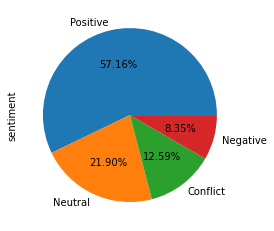

In [272]:
sample['sentiment'].value_counts().plot(kind='pie',autopct='%0.2f%%');

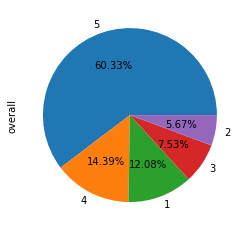

In [273]:
sample['overall'].value_counts().plot(kind='pie',autopct='%0.2f%%');

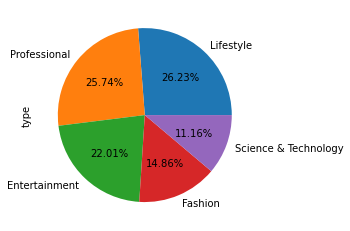

In [274]:
sample['type'].value_counts().plot(kind='pie',autopct='%0.2f%%');

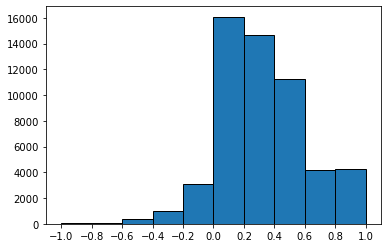

In [275]:
n,bins,patches=plt.hist(sample['polarity'],edgecolor='black');
plt.xticks(bins);

In [276]:
sample['summary']=sample['summary'].apply(cleaning)

In [277]:
cla=sample.copy()

## Classification

In [278]:
cl=sample.loc[:,['reviewText','overall','summary','verified','brand','type','polarity','sentiment']]
cl1=cl.copy()

In [279]:
a=['verified','type','brand','sentiment']
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
for i in a:
    cl[i]=encoder.fit_transform(cl[i])
    
cl.head(3)

,reviewText,overall,summary,verified,brand,type,polarity,sentiment
89496,this review was solicited before too soon i ha...,1,scientific american subscription,1,644,4,0.147572,0
106746,love it,5,five stars,1,690,0,0.500000,3
100798,i quilt a lot but only have a limited time to ...,5,great magazine,1,279,2,0.228324,2


In [280]:
x=cl.iloc[:,0:7]
y=sample[['sentiment']]


In [281]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import recall_score,f1_score,accuracy_score,precision_score,classification_report,confusion_matrix

In [282]:
x_train,x_test,y_train,y_test=train_test_split(x['reviewText'],y,train_size=0.8,random_state=42)

In [283]:
tf=TfidfVectorizer(stop_words='english')

In [284]:
train=tf.fit_transform(x_train)
test=tf.transform(x_test)

In [285]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier()
dtc.fit(train,y_train)

DecisionTreeClassifier()

In [286]:
y_pred=dtc.predict(test)

In [287]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

    Conflict       0.48      0.54      0.51      1241
    Negative       0.56      0.63      0.59       843
     Neutral       0.56      0.57      0.56      2311
    Positive       0.88      0.84      0.86      6605

    accuracy                           0.73     11000
   macro avg       0.62      0.64      0.63     11000
weighted avg       0.74      0.73      0.73     11000



In [288]:
from sklearn.naive_bayes import MultinomialNB #Multinomial NB
mnb=MultinomialNB()
mnb.fit(train,y_train)

MultinomialNB()

In [289]:
y_pred1=mnb.predict(test)

In [290]:
print(classification_report(y_pred1,y_test))

              precision    recall  f1-score   support

    Conflict       0.02      0.45      0.04        62
    Negative       0.05      0.91      0.09        47
     Neutral       0.13      0.35      0.19       880
    Positive       0.99      0.63      0.77     10011

    accuracy                           0.60     11000
   macro avg       0.30      0.58      0.27     11000
weighted avg       0.92      0.60      0.71     11000



In [291]:
rf=RandomForestClassifier(max_depth=4,n_estimators=5,oob_score=True)    #randomforestclassifier
rf.fit(train,y_train)

RandomForestClassifier(max_depth=4, n_estimators=5, oob_score=True)

In [292]:
grid={'max_depth':[4,5,6],'n_estimators':[5,8,10]}

In [293]:
grid_search=GridSearchCV(estimator=rf,param_grid=grid,cv=5,scoring='accuracy')

In [294]:
grid_search.fit(train,y_train)

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(max_depth=4, n_estimators=5,
                                              oob_score=True),
             param_grid={'max_depth': [4, 5, 6], 'n_estimators': [5, 8, 10]},
             scoring='accuracy')

In [295]:
grid_search.best_estimator_

RandomForestClassifier(max_depth=6, n_estimators=5, oob_score=True)

In [296]:
rfc1=RandomForestClassifier(max_depth=6,n_estimators=5,oob_score=True)
rfc1.fit(train,y_train)

RandomForestClassifier(max_depth=6, n_estimators=5, oob_score=True)

In [297]:
y_pred2=rfc1.predict(test)

In [298]:
print(classification_report(y_pred2,y_test))

              precision    recall  f1-score   support

    Conflict       0.00      0.35      0.01        17
    Negative       0.00      0.00      0.00         0
     Neutral       0.02      0.51      0.03        70
    Positive       1.00      0.58      0.73     10913

    accuracy                           0.58     11000
   macro avg       0.25      0.36      0.19     11000
weighted avg       0.99      0.58      0.73     11000



### clustering

In [299]:
tfr=tf.transform(x['reviewText'])

In [300]:
r=[]
for i in tfr:
    r.append(i.toarray().sum())

In [301]:
x['review_num']=r

In [302]:
tfs=tf.transform(x['summary'])
s=[]
for i in tfs:
    s.append(i.toarray().sum())

In [303]:
x['summary_num']=s

In [304]:
c=x.loc[:,['overall','verified','type','polarity','review_num']]
c.head(2)

,overall,verified,type,polarity,review_num
89496,1,1,4,0.147572,6.503098
106746,5,1,0,0.500000,1.000000


In [305]:
c_sd=pd.DataFrame(scaler.fit_transform(c),columns=c.columns)
c_sd.head(3)

,overall,verified,type,polarity,review_num
0,0.0,1.0,1.0,0.573786,0.341122
1,1.0,1.0,0.0,0.750000,0.052455
2,1.0,1.0,0.5,0.614162,0.227085


In [306]:
km=KMeans(n_clusters=5)                   #polarity and type
k_m=km.fit_predict(c_sd.iloc[:,2:3])

In [307]:
c['types']=k_m
c['types'].replace({0:"Entertainment",1:"Fashion",2:"Life-Style",3:'Professional',4:'Science & Technology'},inplace=True)

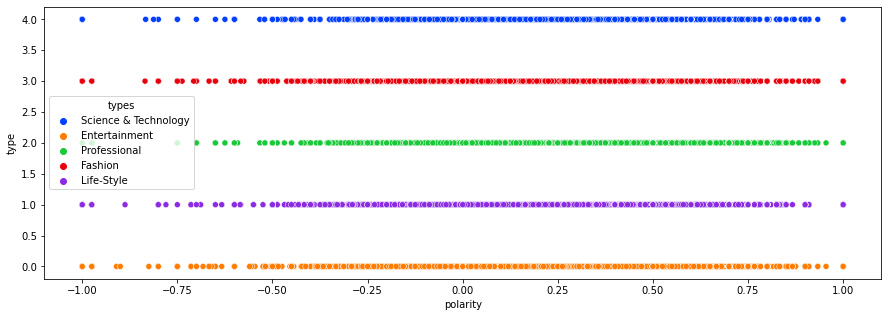

In [308]:
plt.figure(figsize=(15,5))
sns.scatterplot(c['polarity'],c['type'],hue=c['types'],palette='bright');

In [309]:
km1=KMeans(n_clusters=4)                   #polarity and text
k_m1=km1.fit_predict(c_sd.iloc[:,3:4])

In [310]:
c_sd['sentiment']=k_m1
c_sd["sentiment"].replace({0:"Neutral",1:"Negative",2:"Positive",3:'conflict'},inplace=True)
c_sd.head()

,overall,verified,type,polarity,review_num,sentiment
0,0.00,1.0,1.0,0.573786,0.341122,conflict
1,1.00,1.0,0.0,0.750000,0.052455,Neutral
2,1.00,1.0,0.5,0.614162,0.227085,conflict
3,0.75,0.0,0.5,0.662500,0.184750,conflict
4,1.00,1.0,1.0,0.577500,0.215716,conflict


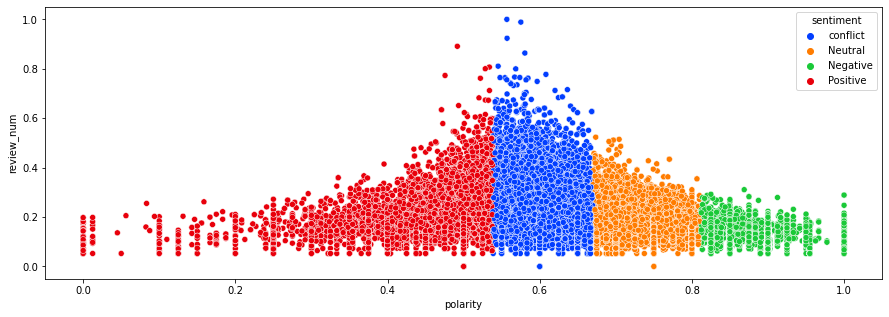

In [311]:
plt.figure(figsize=(15,5))
sns.scatterplot(x=c_sd['polarity'],y=c_sd['review_num'],hue=c_sd['sentiment'],palette='bright');

### Time series

In [312]:
ts=sample.copy()
ts.head(2)

,overall,verified,reviewTime,reviewerID,asin,reviewerName,reviewText,summary,unixReviewTime,category,description,title,also_buy,brand,feature,rank,also_view,details,main_cat,imageURL,imageURLHighRes,word,type,polarity,sentiment
89496,1,True,"01 22, 2014",A3O3UZQ8HI28DN,B00008DP07,P. Hartmann,this review was solicited before too soon i ha...,scientific american subscription,1390348800,Magazine Subscriptions Science History & Natur...,"[Since 1845, Scientific American has been educ...","<span class=""a-size-medium a-color-secondary""","[B00005N7PT, B00005NIOH, B002CT515Q, B002PXW18...",Scientific American,[],[],"[B00005N7PT, B002CT515Q, B00006K3EU, B001GDJ4O...","{'Format:': 'Print Magazine', 'Shipping: ': 'C...",Magazine Subscriptions,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...,Science,Science & Technology,0.147572,Conflict
106746,5,True,"02 25, 2018",A117FW5SX27BOK,B000IOEJ8W,Amazon Customer,love it,five stars,1519516800,Magazine Subscriptions Entertainment &amp; Pop...,"[TV Guide is now Full-Size, Full-Color, for pe...","<span class=""a-size-medium a-color-secondary""","[B004GVZUUY, B001THPA26, B003I7HS3Y, B0061SHL1...",TV Guide,[],[],"[B004GVZUUY, B005EI3V40, B00HSUY3RQ, B07CK37K8...","{'Format:': 'Print Magazine', 'Shipping: ': 'C...",Magazine Subscriptions,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...,Entertainment,Entertainment,0.500000,Positive


In [313]:
ts['reviewTime']=pd.to_datetime(ts['reviewTime'])

In [314]:
ts.set_index('reviewTime',inplace=True)
ts.sort_index(inplace=True)

In [315]:
ts['type'].unique()

array(['Professional', 'Lifestyle', 'Fashion', 'Entertainment',
       'Science & Technology'], dtype=object)

In [316]:
sampled_pro=ts[ts.type=='Professional']
sampled_ls=ts[ts.type=='Lifestyle']
sampled_f=ts[ts.type=='Fashion']
sampled_e=ts[ts.type=='Entertainment']
sampled_st=ts[ts.type=='Science & Technology']

In [317]:
pro_o=sampled_pro[['overall']]
ls_o=sampled_ls[['overall']]
f_o=sampled_f[['overall']]
e_o=sampled_e[['overall']]
st_o=sampled_st[['overall']]

### Professional

In [318]:
r_p=pro_o.resample('q').mean()

In [319]:
r_p.drop('2018-09-30',axis=0,inplace=True)

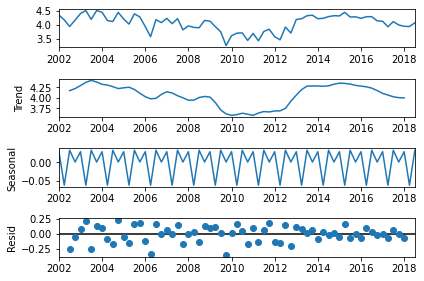

In [320]:
seasonal_decompose(r_p,period=4).plot();

In [321]:
stationary(r_p)

'p_value=0.09760315917573692.Data is not stationary'

In [322]:
diff=r_p-r_p.shift()
diff.dropna(inplace=True)

In [323]:
stationary(diff)

'p_value=4.9879779767157986e-20.Data is stationary'

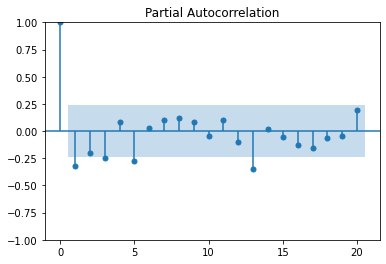

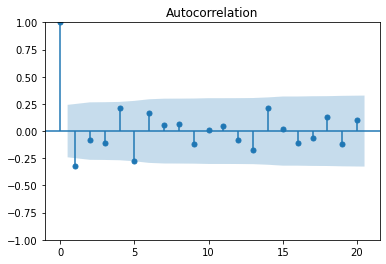

In [324]:
plot_pacf(diff,lags=20);
plot_acf(diff,lags=20);

In [325]:
m=[1,2,3]
for i in m:
    arima=ARIMA(r_p,order=(i,1,1)).fit()
    print(i,arima.aic)

1 -16.10855875678166
2 -13.131147513525182
3 -15.785816145056387


In [326]:
p=2;q=1;d=1
for i in range(1,3):
    for j in range(1,3):
        sarima=sm.tsa.statespace.SARIMAX(r_p,order=(p,d,q),seasonal_order=(i,1,j,4)).fit()
        print(sarima.summary())

                                     SARIMAX Results                                     
Dep. Variable:                           overall   No. Observations:                   67
Model:             SARIMAX(2, 1, 1)x(1, 1, 1, 4)   Log Likelihood                   6.175
Date:                           Fri, 24 Mar 2023   AIC                             -0.351
Time:                                   09:35:32   BIC                             12.412
Sample:                               12-31-2001   HQIC                             4.660
                                    - 06-30-2018                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2815      0.420      0.670      0.503      -0.542       1.106
ar.L2         -0.1098      0.234     -0.469

C:\Users\ganes\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                       SARIMAX Results                                        
Dep. Variable:                                overall   No. Observations:                   67
Model:             SARIMAX(2, 1, 1)x(1, 1, [1, 2], 4)   Log Likelihood                   6.208
Date:                                Fri, 24 Mar 2023   AIC                              1.583
Time:                                        09:35:32   BIC                             16.473
Sample:                                    12-31-2001   HQIC                             7.429
                                         - 06-30-2018                                         
Covariance Type:                                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2734      0.427      0.641      0.522      -0.563       1.110
ar.

C:\Users\ganes\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                     SARIMAX Results                                     
Dep. Variable:                           overall   No. Observations:                   67
Model:             SARIMAX(2, 1, 1)x(2, 1, 1, 4)   Log Likelihood                   6.278
Date:                           Fri, 24 Mar 2023   AIC                              1.444
Time:                                   09:35:33   BIC                             16.334
Sample:                               12-31-2001   HQIC                             7.290
                                    - 06-30-2018                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2416      0.429      0.563      0.573      -0.599       1.083
ar.L2         -0.1189      0.233     -0.511

C:\Users\ganes\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [327]:
sarima=sm.tsa.statespace.SARIMAX(r_p,order=(1,1,1),seasonal_order=(1,1,1,12)).fit()
print(sarima.summary())

                                     SARIMAX Results                                      
Dep. Variable:                            overall   No. Observations:                   67
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                   0.285
Date:                            Fri, 24 Mar 2023   AIC                              9.431
Time:                                    09:35:33   BIC                             19.376
Sample:                                12-31-2001   HQIC                            13.266
                                     - 06-30-2018                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1837      0.347      0.529      0.597      -0.497       0.864
ma.L1         -0.5782      0.304   

In [328]:
sarima.forecast(10)

2018-09-30    3.897865
2018-12-31    4.193458
2019-03-31    4.095711
2019-06-30    4.179325
2019-09-30    4.077263
2019-12-31    4.118219
2020-03-31    4.003952
2020-06-30    4.112630
2020-09-30    4.241437
2020-12-31    4.133426
Freq: Q-DEC, Name: predicted_mean, dtype: float64

In [329]:
pvalue = sm.stats.acorr_ljungbox(sarima.resid,lags=[1],return_df=True)['lb_pvalue'].values
print(pvalue)
if pvalue < 0.05:
    print("Reject H0. Bad model")
else:
    print("Fail-to-Reject H0. Good model")

[0.63526383]
Fail-to-Reject H0. Good model


In [330]:
split=int(0.7*len(r_p))
train=r_p.iloc[:split]
test=r_p.iloc[split:]
print(len(train),len(test))

46 21


In [331]:
predictions_p=sarima.predict(len(train),len(test+train)-1)
print(predictions_p)

reviewTime
2013-06-30    4.133345
2013-09-30    4.124561
2013-12-31    4.245102
2014-03-31    4.094512
2014-06-30    4.223693
2014-09-30    4.376388
2014-12-31    4.285063
2015-03-31    4.130458
2015-06-30    4.362718
2015-09-30    4.163246
2015-12-31    4.384367
2016-03-31    4.160072
2016-06-30    4.307635
2016-09-30    4.124518
2016-12-31    4.248195
2017-03-31    3.984629
2017-06-30    4.111445
2017-09-30    4.237423
2017-12-31    3.955872
2018-03-31    3.773381
2018-06-30    4.103633
Freq: Q-DEC, Name: predicted_mean, dtype: float64


In [332]:
actual = []; pred = []
test_s=test.squeeze()

for i in range(len(predictions_p)):
    actual.append(test_s[i])
    pred.append(predictions_p[i])

df_res = pd.DataFrame({'actual':actual, 'predicted':pred})
df_res['err'] = df_res.actual - df_res.predicted
print(df_res)

      actual  predicted       err
0   4.329897   4.133345  0.196552
1   4.348066   4.124561  0.223505
2   4.223195   4.245102 -0.021908
3   4.237537   4.094512  0.143024
4   4.297297   4.223693  0.073604
5   4.330537   4.376388 -0.045851
6   4.322357   4.285063  0.037294
7   4.450166   4.130458  0.319708
8   4.284333   4.362718 -0.078385
9   4.291765   4.163246  0.128518
10  4.236534   4.384367 -0.147833
11  4.295833   4.160072  0.135762
12  4.294624   4.307635 -0.013012
13  4.148585   4.124518  0.024067
14  4.133047   4.248195 -0.115148
15  3.938776   3.984629 -0.045853
16  4.119914   4.111445  0.008469
17  4.002331   4.237423 -0.235092
18  3.954397   3.955872 -0.001475
19  3.947137   3.773381  0.173756
20  4.078341   4.103633 -0.025292


<AxesSubplot:>

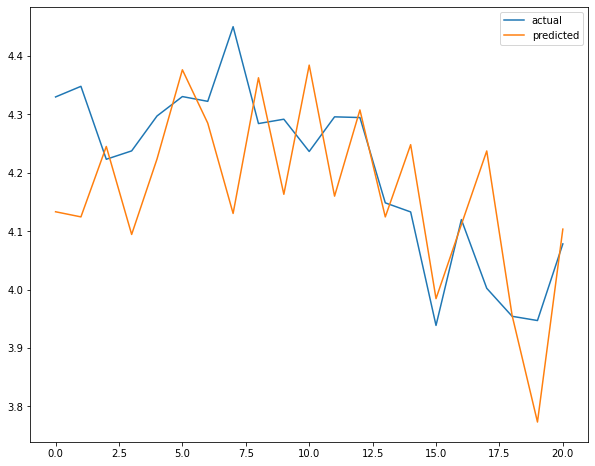

In [333]:
df_res.actual.plot(figsize=(10,8),legend=True)
df_res.predicted.plot(legend=True)

In [334]:
from sklearn.metrics import mean_squared_error
mse_p=mean_squared_error(df_res.actual,df_res.predicted)
rmse_p=mean_squared_error(df_res.actual,df_res.predicted,squared=False)
print('MSE:',mse_p)
print('RMSE:',rmse_p)

MSE: 0.018375101656046073
RMSE: 0.13555479208071575


In [335]:
p=r_p[-1:]
p

,overall
reviewTime,
2018-06-30,4.078341


In [336]:
p_o=pd.DataFrame(sarima.forecast(12))
p_o.columns=['overall']
ps=pd.concat([p,p_o],axis=0)

Text(0, 0.5, 'Rating')

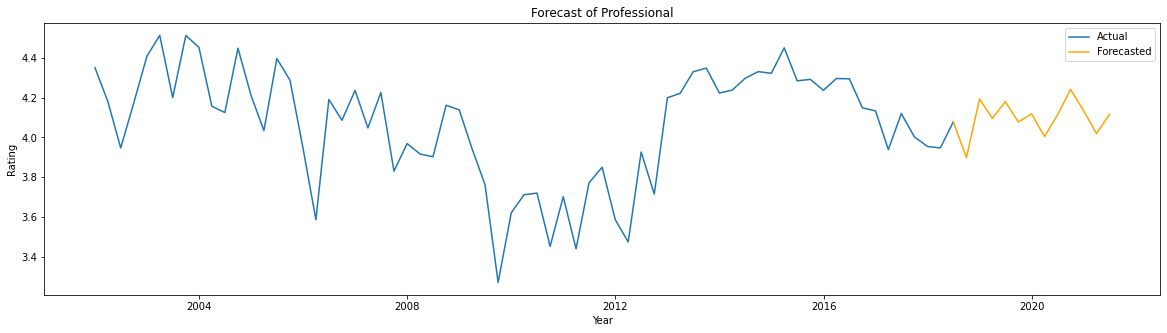

In [337]:
plt.figure(figsize=(20,5))
plt.plot(r_p,label='Actual')
plt.plot(ps['overall'],color='orange',label='Forecasted')
plt.title('Forecast of Professional')
plt.legend()
plt.xlabel('Year')
plt.ylabel('Rating')

### Life-style

In [338]:
r_ls=ls_o.resample('q').mean()

In [339]:
stationary(r_ls)

'p_value=0.11046519606883742.Data is not stationary'

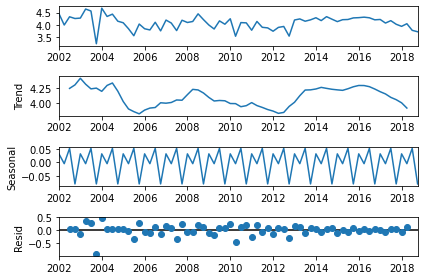

In [340]:
seasonal_decompose(r_ls,period=4).plot();

In [341]:
diff_ls=r_ls-r_ls.shift()
diff_ls.dropna(inplace=True)

In [342]:
stationary(diff_ls)

'p_value=4.909982957510249e-19.Data is stationary'

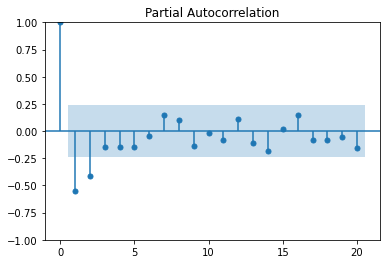

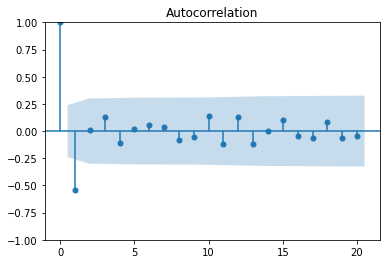

In [343]:
plot_pacf(diff_ls,lags=20);
plot_acf(diff_ls,lags=20);

In [344]:
m=[1,2]
for i in m:
    arima=ARIMA(r_ls,order=(i,1,1)).fit()
    print(i,arima.aic)

1 16.15221338924534
2 17.387587152682478


In [345]:
p=1;q=1;d=1
for i in range(1,3):
    for j in range(1,3):
        sarima=sm.tsa.statespace.SARIMAX(r_ls,order=(p,d,q),seasonal_order=(i,1,j,4)).fit()
        print(sarima.summary())

C:\Users\ganes\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                     SARIMAX Results                                     
Dep. Variable:                           overall   No. Observations:                   68
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 4)   Log Likelihood                 -10.887
Date:                           Fri, 24 Mar 2023   AIC                             31.775
Time:                                   09:35:35   BIC                             42.490
Sample:                               12-31-2001   HQIC                            35.989
                                    - 09-30-2018                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1683      0.189     -0.891      0.373      -0.538       0.202
ma.L1         -0.6494      0.157     -4.128

C:\Users\ganes\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                       SARIMAX Results                                        
Dep. Variable:                                overall   No. Observations:                   68
Model:             SARIMAX(1, 1, 1)x(1, 1, [1, 2], 4)   Log Likelihood                 -10.804
Date:                                Fri, 24 Mar 2023   AIC                             33.609
Time:                                        09:35:35   BIC                             46.467
Sample:                                    12-31-2001   HQIC                            38.666
                                         - 09-30-2018                                         
Covariance Type:                                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1748      0.190     -0.921      0.357      -0.547       0.197
ma.

C:\Users\ganes\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                     SARIMAX Results                                     
Dep. Variable:                           overall   No. Observations:                   68
Model:             SARIMAX(1, 1, 1)x(2, 1, 1, 4)   Log Likelihood                 -10.455
Date:                           Fri, 24 Mar 2023   AIC                             32.910
Time:                                   09:35:35   BIC                             45.769
Sample:                               12-31-2001   HQIC                            37.968
                                    - 09-30-2018                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1704      0.195     -0.875      0.382      -0.552       0.211
ma.L1         -0.6467      0.176     -3.676

C:\Users\ganes\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [346]:
sarima2=sm.tsa.statespace.SARIMAX(r_ls,order=(1,1,1),seasonal_order=(1,1,1,12)).fit()
print(sarima2.summary())

                                     SARIMAX Results                                      
Dep. Variable:                            overall   No. Observations:                   68
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                 -16.316
Date:                            Fri, 24 Mar 2023   AIC                             42.632
Time:                                    09:35:36   BIC                             52.669
Sample:                                12-31-2001   HQIC                            46.514
                                     - 09-30-2018                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1437      0.206      0.699      0.485      -0.259       0.547
ma.L1         -0.8727      0.124   

In [347]:
sarima2.forecast(10)

2018-12-31    4.114870
2019-03-31    4.461046
2019-06-30    4.093886
2019-09-30    4.250277
2019-12-31    4.382124
2020-03-31    4.132672
2020-06-30    4.562973
2020-09-30    4.192388
2020-12-31    4.125719
2021-03-31    4.213796
Freq: Q-DEC, Name: predicted_mean, dtype: float64

In [348]:
pvalue = sm.stats.acorr_ljungbox(sarima2.resid,lags=[1],return_df=True)['lb_pvalue'].values
print(pvalue)
if pvalue < 0.05:
    print("Reject H0. Bad model")
else:
    print("Fail-to-Reject H0. Good model")

[0.28102575]
Fail-to-Reject H0. Good model


In [349]:
split=int(0.7*len(r_ls))
train=r_ls.iloc[:split]
test=r_ls.iloc[split:]
print(len(train),len(test))

47 21


In [350]:
predictions_ls=sarima2.predict(len(train),len(test+train)-1)
print(predictions_ls)

reviewTime
2013-09-30    4.231156
2013-12-31    3.958579
2014-03-31    4.350130
2014-06-30    4.408973
2014-09-30    4.064470
2014-12-31    4.006314
2015-03-31    4.177988
2015-06-30    4.191296
2015-09-30    3.694310
2015-12-31    4.580277
2016-03-31    4.150316
2016-06-30    4.532037
2016-09-30    4.249646
2016-12-31    4.222524
2017-03-31    4.242655
2017-06-30    3.976766
2017-09-30    4.218705
2017-12-31    4.027162
2018-03-31    4.115627
2018-06-30    4.137750
2018-09-30    4.122672
Freq: Q-DEC, Name: predicted_mean, dtype: float64


In [351]:
actual2 = []; pred2 = []
test_s=test.squeeze()

for i in range(len(predictions_ls)):
    actual2.append(test_s[i])
    pred2.append(predictions_ls[i])

df_res2 = pd.DataFrame({'actual':actual2, 'predicted':pred2})
df_res2['err'] = df_res2.actual - df_res2.predicted
print(df_res2)

      actual  predicted       err
0   4.209581   4.231156 -0.021575
1   4.294537   3.958579  0.335958
2   4.179104   4.350130 -0.171025
3   4.338205   4.408973 -0.070768
4   4.236264   4.064470  0.171794
5   4.137771   4.006314  0.131456
6   4.215152   4.177988  0.037164
7   4.223510   4.191296  0.032214
8   4.287719   3.694310  0.593409
9   4.297826   4.580277 -0.282451
10  4.318115   4.150316  0.167799
11  4.292308   4.532037 -0.239729
12  4.209877   4.249646 -0.039770
13  4.224319   4.222524  0.001795
14  4.078902   4.242655 -0.163752
15  4.176349   3.976766  0.199582
16  4.030238   4.218705 -0.188468
17  3.945946   4.027162 -0.081216
18  4.052061   4.115627 -0.063567
19  3.784314   4.137750 -0.353436
20  3.727273   4.122672 -0.395399


<AxesSubplot:>

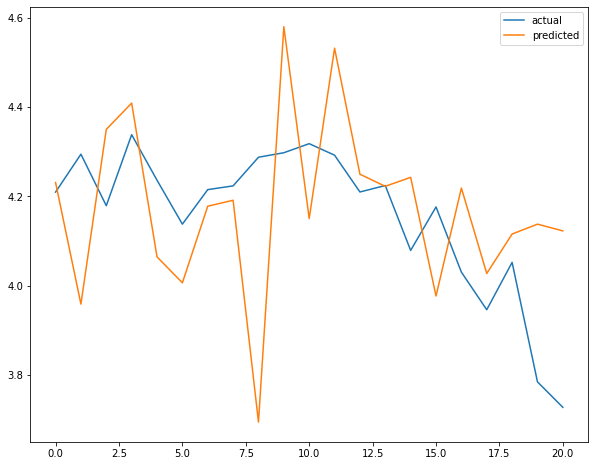

In [352]:
df_res2.actual.plot(figsize=(10,8),legend=True)
df_res2.predicted.plot(legend=True)

In [353]:
mse_ls=mean_squared_error(df_res2.actual,df_res2.predicted)
rmse_ls=mean_squared_error(df_res2.actual,df_res2.predicted,squared=False)
print('MSE:',mse_ls)
print('RMSE:',rmse_ls)

MSE: 0.052856683350650385
RMSE: 0.22990581408622615


In [354]:
ls=r_ls[-1:]
ls

,overall
reviewTime,
2018-09-30,3.727273


In [355]:
ls_o=pd.DataFrame(sarima2.forecast(10))
ls_o.columns=['overall']
ls=pd.concat([ls,ls_o],axis=0)


Text(0, 0.5, 'Rating')

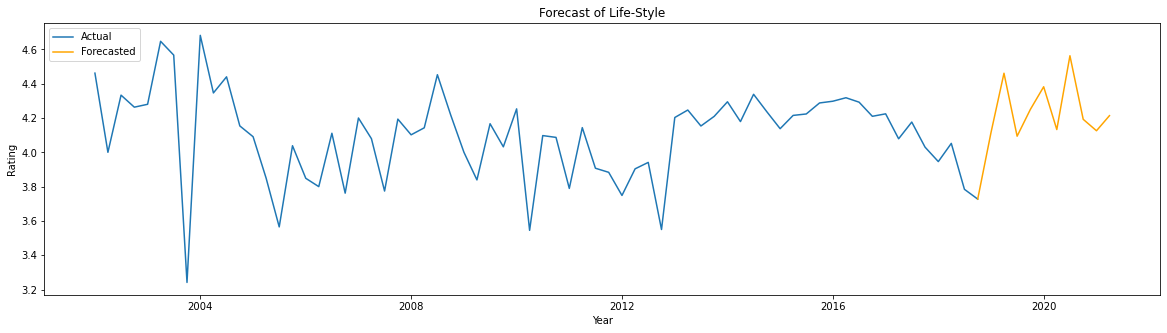

In [356]:
plt.figure(figsize=(20,5))
plt.plot(r_ls,label='Actual')
plt.plot(ls['overall'],color='orange',label='Forecasted')
plt.title('Forecast of Life-Style')
plt.legend()
plt.xlabel('Year')
plt.ylabel('Rating')

### Fashion

In [357]:
r_f=f_o.resample('q').mean()

In [358]:
stationary(r_f)

'p_value=0.0022967738195982003.Data is stationary'

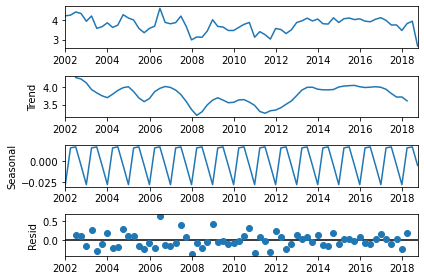

In [359]:
seasonal_decompose(r_f).plot();

In [360]:
ftf=ExponentialSmoothing(r_f,trend='add',seasonal='add',seasonal_periods=4).fit(smoothing_level=0.5,smoothing_trend=0.25,smoothing_seasonal=0.15)

In [361]:
forecasted_f=ftf.fittedvalues


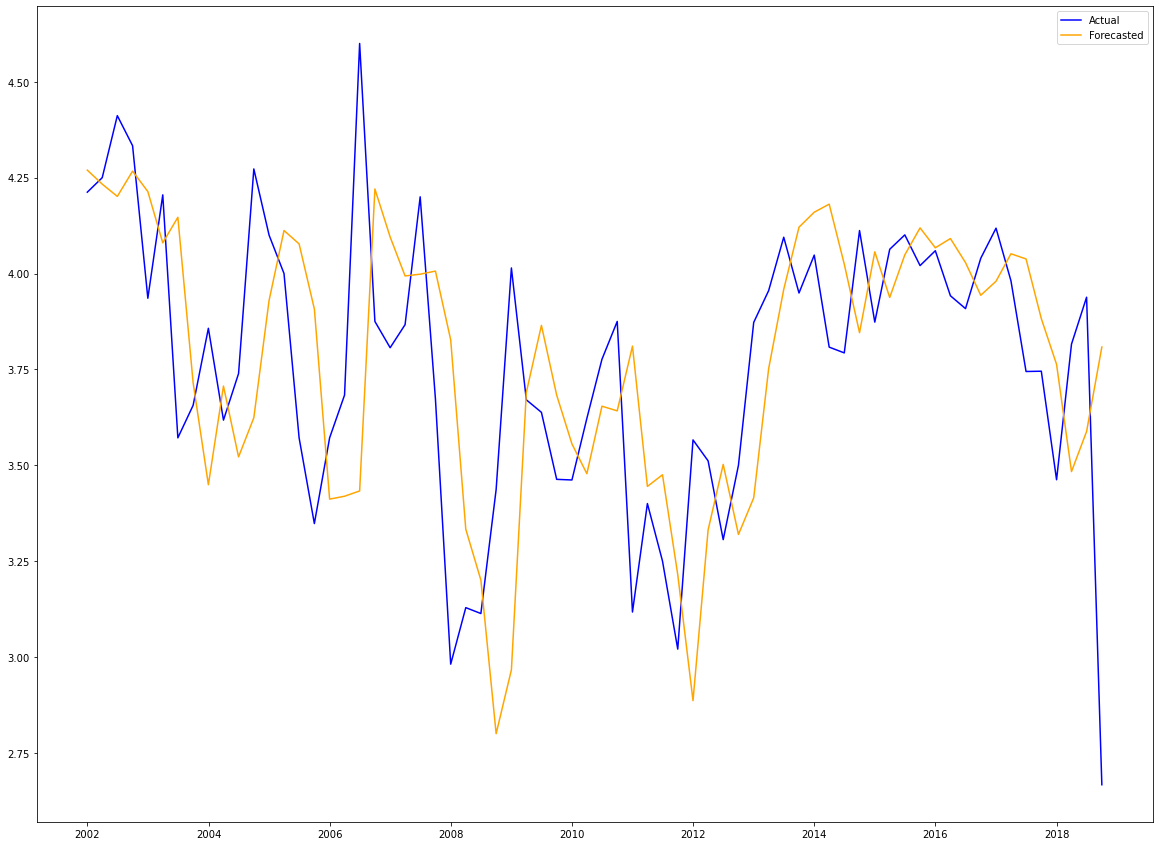

In [362]:
plt.figure(figsize=(20,15))
plt.plot(r_f,color='blue',label='Actual')
plt.plot(forecasted_f,color='orange',label='Forecasted')
plt.legend()

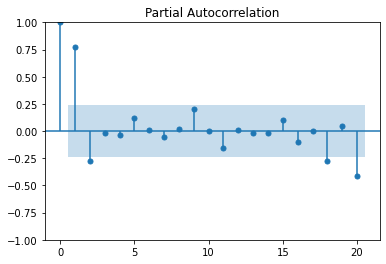

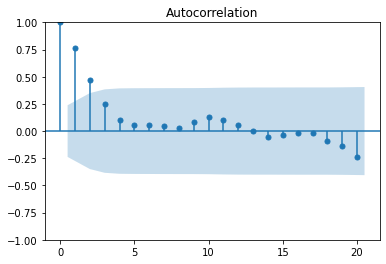

In [363]:
plot_pacf(forecasted_f,lags=20);
plot_acf(forecasted_f,lags=20);

In [364]:
z=[1,2,3,4]
y=[1,2]
for i in z:
    for j in y:
        ar=ARIMA(forecasted_f,order=(i,0,j)).fit()
        print(i,j,ar.aic)

1 1 -7.774126421154698
1 2 -5.959578647373608
2 1 -6.173184563182932
2 2 -4.173487493222481


C:\Users\ganes\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ganes\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


3 1 -5.449244186066096
3 2 -3.5314482644929868
4 1 -3.5700461398693975
4 2 -0.7713856333693663


C:\Users\ganes\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ganes\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [365]:
arma=ARIMA(forecasted_f,order=(4,0,4)).fit()
print(arma.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   68
Model:                 ARIMA(4, 0, 4)   Log Likelihood                   9.852
Date:                Fri, 24 Mar 2023   AIC                              0.297
Time:                        09:35:38   BIC                             22.492
Sample:                    12-31-2001   HQIC                             9.091
                         - 09-30-2018                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.8040      0.104     36.723      0.000       3.601       4.007
ar.L1          0.0092      0.866      0.011      0.992      -1.688       1.706
ar.L2         -0.2458      0.534     -0.461      0.6

C:\Users\ganes\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [366]:
arma.forecast(10)

2018-12-31    3.868740
2019-03-31    3.945848
2019-06-30    3.899483
2019-09-30    3.790312
2019-12-31    3.764228
2020-03-31    3.837615
2020-06-30    3.858605
2020-09-30    3.802647
2020-12-31    3.763445
2021-03-31    3.801399
Freq: Q-DEC, Name: predicted_mean, dtype: float64

In [367]:
split=int(0.7*len(forecasted_f))
train=forecasted_f.iloc[:split]
test=forecasted_f.iloc[split:]
print(len(train),len(test))

47 21


In [368]:
predictions_f=arma.predict(len(train),len(test+train)-1)
print(predictions_f)

reviewTime
2013-09-30    4.029425
2013-12-31    4.148422
2014-03-31    4.022117
2014-06-30    3.992892
2014-09-30    3.954801
2014-12-31    3.883728
2015-03-31    4.017722
2015-06-30    3.804484
2015-09-30    4.028452
2015-12-31    4.089191
2016-03-31    4.019652
2016-06-30    3.949475
2016-09-30    3.929710
2016-12-31    3.933971
2017-03-31    3.982082
2017-06-30    3.958651
2017-09-30    3.945367
2017-12-31    3.847502
2018-03-31    3.776911
2018-06-30    3.475216
2018-09-30    3.644218
Freq: Q-DEC, Name: predicted_mean, dtype: float64


In [369]:
actual3 = []; pred3 = []

for i in range(len(predictions_f)):
    actual3.append(test[i])
    pred3.append(predictions_f[i])

df_res3 = pd.DataFrame({'actual':actual3, 'predicted':pred3})
df_res3['err'] = df_res3.actual - df_res3.predicted
print(df_res3)

      actual  predicted       err
0   4.120814   4.029425  0.091388
1   4.159958   4.148422  0.011535
2   4.180907   4.022117  0.158790
3   4.024341   3.992892  0.031449
4   3.845678   3.954801 -0.109123
5   4.056583   3.883728  0.172855
6   3.937524   4.017722 -0.080198
7   4.048640   3.804484  0.244156
8   4.118998   4.028452  0.090546
9   4.067086   4.089191 -0.022104
10  4.091208   4.019652  0.071556
11  4.028435   3.949475  0.078960
12  3.943262   3.929710  0.013553
13  3.979882   3.933971  0.045910
14  4.051472   3.982082  0.069389
15  4.037962   3.958651  0.079311
16  3.882380   3.945367 -0.062987
17  3.763017   3.847502 -0.084486
18  3.483382   3.776911 -0.293529
19  3.588011   3.475216  0.112795
20  3.808261   3.644218  0.164043


<AxesSubplot:>

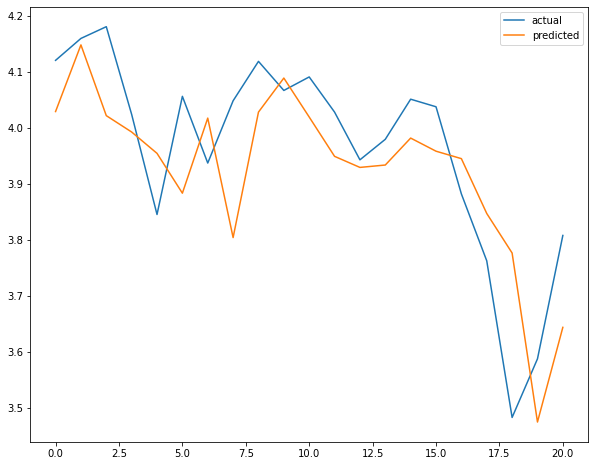

In [370]:
df_res3.actual.plot(figsize=(10,8),legend=True)
df_res3.predicted.plot(legend=True)

In [371]:
mse_f=mean_squared_error(df_res3.actual,df_res3.predicted)
rmse_f=mean_squared_error(df_res3.actual,df_res3.predicted,squared=False)
print('MSE:',mse_f)
print('RMSE:',rmse_f)

MSE: 0.014897848489655632
RMSE: 0.12205674290941747


In [372]:
f=pd.DataFrame(forecasted_f[-1:])
f.columns=['overall']
f

,overall
reviewTime,
2018-09-30,3.808261


In [373]:
arif=pd.DataFrame(arma.forecast(10))
arif.columns=['overall']
forec=pd.concat([f,arif],axis=0)

Text(0, 0.5, 'Rating')

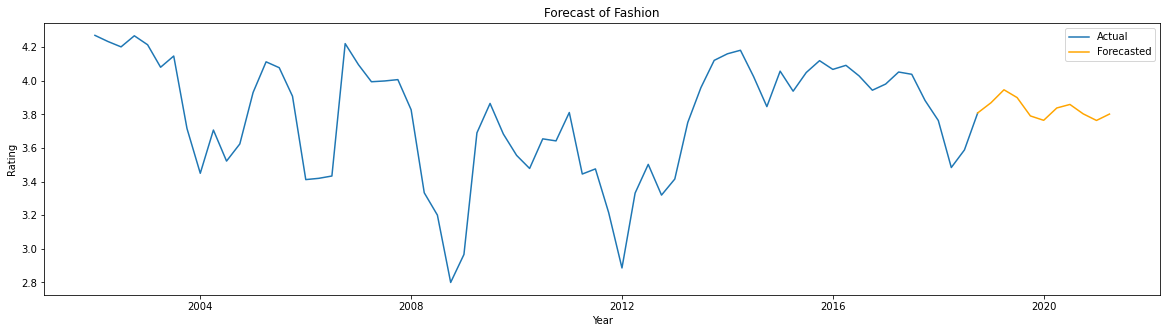

In [374]:
plt.figure(figsize=(20,5))
plt.plot(forecasted_f,label='Actual')
plt.plot(forec['overall'],color='orange',label='Forecasted')
plt.title('Forecast of Fashion')
plt.legend()
plt.xlabel('Year')
plt.ylabel('Rating')
#plt.ylim(0,5);

### Entertainment

In [375]:
r_e=e_o.resample('q').mean()

In [376]:
stationary(r_e)

'p_value=0.00033614640769793265.Data is stationary'

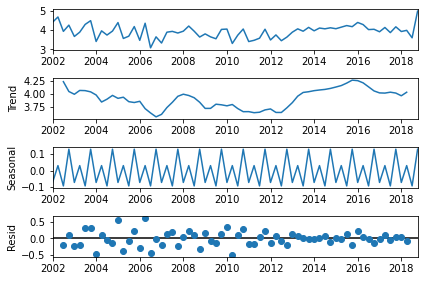

In [377]:
seasonal_decompose(r_e,period=4).plot();

In [378]:
ften=ExponentialSmoothing(r_e,trend='add',seasonal='add',seasonal_periods=4).fit(smoothing_level=0.5,smoothing_trend=0.35,smoothing_seasonal=0.15)

In [379]:
forecasted_e=ften.fittedvalues

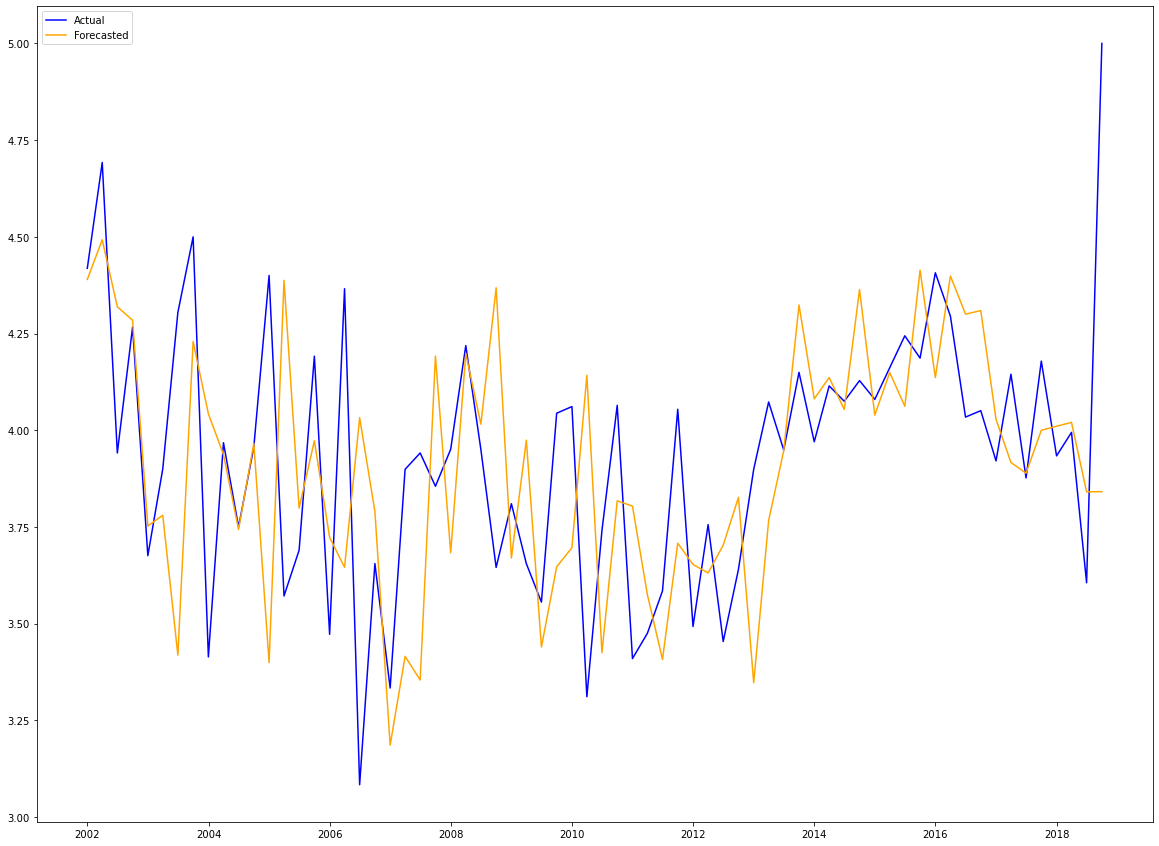

In [380]:
plt.figure(figsize=(20,15))
plt.plot(r_e,color='blue',label='Actual')
plt.plot(forecasted_e,color='orange',label='Forecasted')
plt.legend()

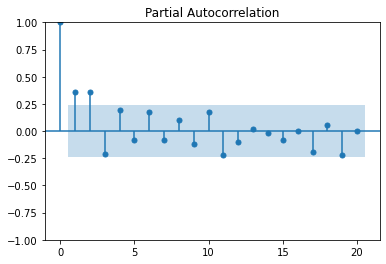

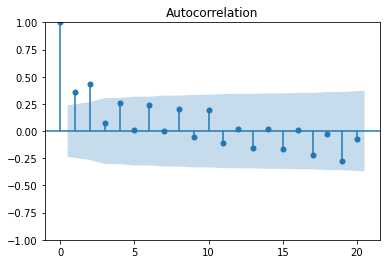

In [381]:
plot_pacf(forecasted_e,lags=20);
plot_acf(forecasted_e,lags=20);

In [382]:
z=[1,2]
for i in z:
    for j in z:
        ar1=ARIMA(forecasted_e,order=(i,0,j)).fit()
        print(i,j,ar1.aic)

1 1 27.54230135861058
1 2 26.196646075361613
2 1 13.768127804631453
2 2 15.28496959270879


In [383]:
arma2=ARIMA(forecasted_e,order=(5,0,5)).fit()
print(arma2.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   68
Model:                 ARIMA(5, 0, 5)   Log Likelihood                  -0.018
Date:                Fri, 24 Mar 2023   AIC                             24.036
Time:                        09:35:40   BIC                             50.670
Sample:                    12-31-2001   HQIC                            34.589
                         - 09-30-2018                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.8940      0.047     82.934      0.000       3.802       3.986
ar.L1          1.2192      0.239      5.103      0.000       0.751       1.687
ar.L2         -0.3352      0.273     -1.228      0.2

C:\Users\ganes\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [384]:
arma2.forecast(10)

2018-12-31    3.680736
2019-03-31    3.945184
2019-06-30    3.709951
2019-09-30    3.849861
2019-12-31    3.612795
2020-03-31    3.887466
2020-06-30    3.718837
2020-09-30    3.899046
2020-12-31    3.632811
2021-03-31    3.872156
Freq: Q-DEC, Name: predicted_mean, dtype: float64

In [385]:
split=int(0.7*len(forecasted_e))
train=forecasted_e.iloc[:split]
test=forecasted_e.iloc[split:]
print(len(train),len(test))

47 21


In [386]:
predictions_e=arma2.predict(len(train),len(test+train)-1)
print(predictions_e)

reviewTime
2013-09-30    4.131892
2013-12-31    3.943219
2014-03-31    4.244138
2014-06-30    3.987605
2014-09-30    4.303963
2014-12-31    4.052942
2015-03-31    4.216313
2015-06-30    3.917038
2015-09-30    4.263747
2015-12-31    4.087776
2016-03-31    4.257833
2016-06-30    3.979877
2016-09-30    4.340795
2016-12-31    4.062369
2017-03-31    4.195762
2017-06-30    3.714302
2017-09-30    3.996496
2017-12-31    3.802890
2018-03-31    4.113953
2018-06-30    3.746044
2018-09-30    3.926172
Freq: Q-DEC, Name: predicted_mean, dtype: float64


In [387]:
actual4 = []; pred4 = []

for i in range(len(predictions_e)):
    actual4.append(test[i])
    pred4.append(predictions_e[i])

df_res4 = pd.DataFrame({'actual':actual4, 'predicted':pred4})
df_res4['err'] = df_res4.actual - df_res4.predicted
print(df_res4)

      actual  predicted       err
0   4.323744   4.131892  0.191852
1   4.081116   3.943219  0.137898
2   4.136279   4.244138 -0.107858
3   4.053677   3.987605  0.066072
4   4.363552   4.303963  0.059589
5   4.039097   4.052942 -0.013844
6   4.149316   4.216313 -0.066997
7   4.061894   3.917038  0.144856
8   4.413794   4.263747  0.150047
9   4.136003   4.087776  0.048227
10  4.398883   4.257833  0.141050
11  4.300101   3.979877  0.320224
12  4.309255   4.340795 -0.031540
13  4.027971   4.062369 -0.034398
14  3.916509   4.195762 -0.279254
15  3.888927   3.714302  0.174625
16  3.999836   3.996496  0.003340
17  4.010351   3.802890  0.207460
18  4.020194   4.113953 -0.093759
19  3.840681   3.746044  0.094637
20  3.841109   3.926172 -0.085063


<AxesSubplot:>

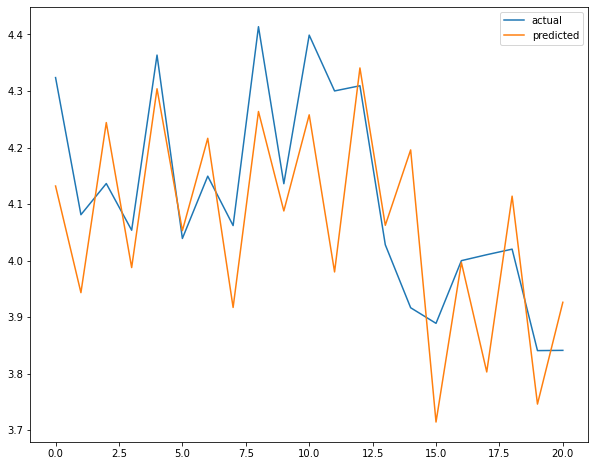

In [388]:
df_res4.actual.plot(figsize=(10,8),legend=True)
df_res4.predicted.plot(legend=True)

In [389]:
mse_e=mean_squared_error(df_res4.actual,df_res4.predicted)
rmse_e=mean_squared_error(df_res4.actual,df_res4.predicted,squared=False)
print('MSE:',mse_e)
print('RMSE:',rmse_e)

MSE: 0.0203334495745448
RMSE: 0.14259540516631242


In [390]:
e=pd.DataFrame(forecasted_e[-1:])
e.columns=['overall']
e

,overall
reviewTime,
2018-09-30,3.841109


In [391]:
arie=pd.DataFrame(arma2.forecast(10))
arie.columns=['overall']
fore=pd.concat([e,arie],axis=0)

Text(0, 0.5, 'Rating')

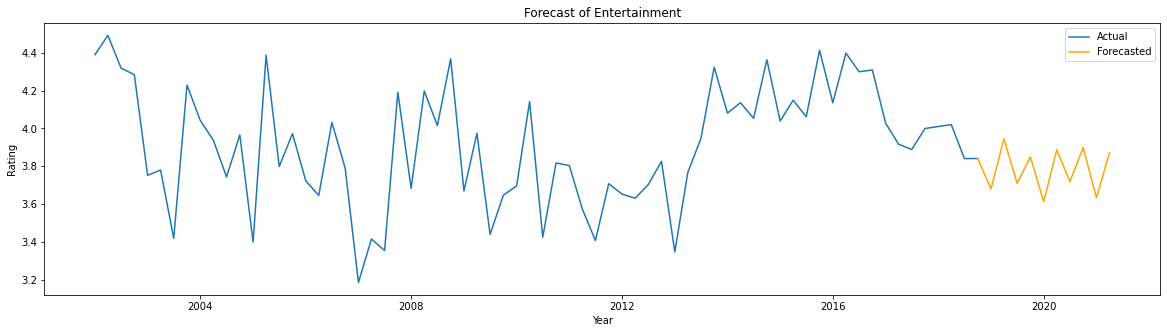

In [392]:
plt.figure(figsize=(20,5))
plt.plot(forecasted_e,label='Actual')
plt.plot(fore['overall'],color='orange',label='Forecasted')
plt.title('Forecast of Entertainment')
plt.legend()
plt.xlabel('Year')
plt.ylabel('Rating')
#plt.ylim(0,5);

### Science & Technology

In [393]:
r_st=st_o.resample('q').mean()

In [394]:
stationary(r_st)

'p_value=0.007132455147044029.Data is stationary'

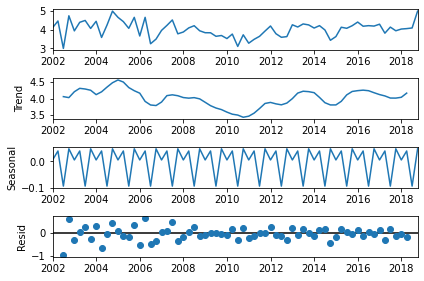

In [395]:
seasonal_decompose(r_st,period=4).plot();

In [396]:
ftst=ExponentialSmoothing(r_st,trend='add',seasonal='add',seasonal_periods=4).fit(smoothing_level=0.9,smoothing_trend=0.9,smoothing_seasonal=0.9)

In [397]:
forecasted_st=ftst.fittedvalues

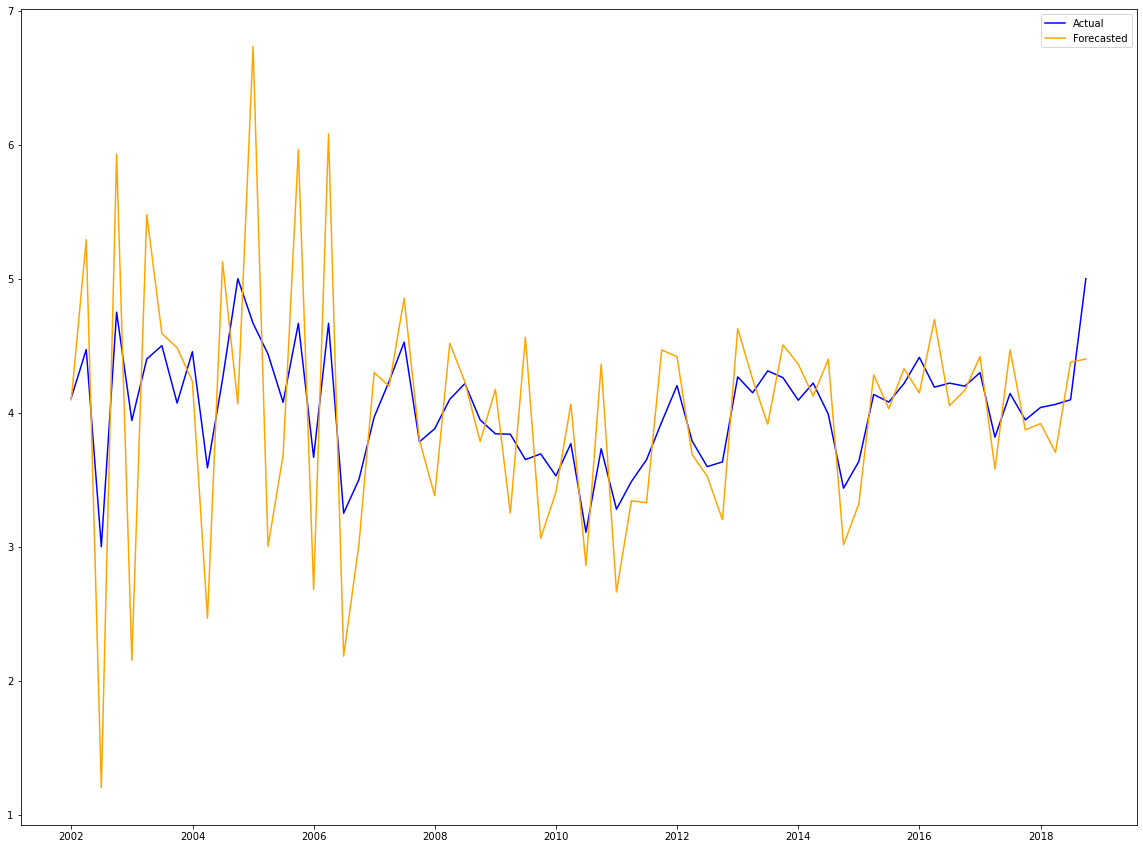

In [398]:
plt.figure(figsize=(20,15))
plt.plot(r_st,color='blue',label='Actual')
plt.plot(forecasted_st,color='orange',label='Forecasted')
plt.legend()

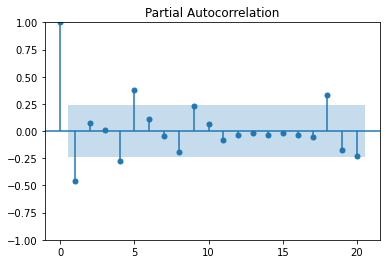

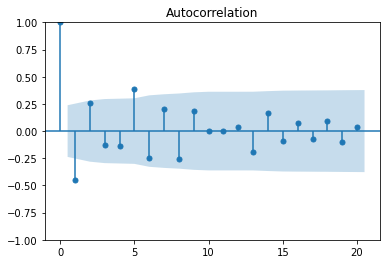

In [399]:
plot_pacf(forecasted_st,lags=20);
plot_acf(forecasted_st,lags=20);

In [400]:
z=[1,2,3,4]
y=[1,2]
for i in z:
    for j in y:
        ar1=ARIMA(forecasted_st,order=(i,0,j)).fit()
        print(i,j,ar1.aic)

1 1 176.2470710876605
1 2 181.57383434995168
2 1 178.1769697835473
2 2 164.559580420825
3 1 180.08921422751783
3 2 164.99899660259692
4 1 165.85140729833776
4 2 169.89654422690728


C:\Users\ganes\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [401]:
arma3=ARIMA(forecasted_st,order=(4,0,1)).fit()
print(arma3.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   68
Model:                 ARIMA(4, 0, 1)   Log Likelihood                 -75.926
Date:                Fri, 24 Mar 2023   AIC                            165.851
Time:                        09:35:42   BIC                            181.388
Sample:                    12-31-2001   HQIC                           172.007
                         - 09-30-2018                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.0079      0.066     60.601      0.000       3.878       4.138
ar.L1         -1.0326      0.184     -5.612      0.000      -1.393      -0.672
ar.L2         -0.1422      0.214     -0.664      0.5

In [402]:
arma3.forecast(10)

2018-12-31    3.806905
2019-03-31    4.251878
2019-06-30    3.644022
2019-09-30    4.220688
2019-12-31    3.900930
2020-03-31    4.016300
2020-06-30    4.132565
2020-09-30    3.808309
2020-12-31    4.232806
2021-03-31    3.796973
Freq: Q-DEC, Name: predicted_mean, dtype: float64

In [403]:
split=int(0.7*len(forecasted_st))
train=forecasted_st.iloc[:split]
test=forecasted_st.iloc[split:]
print(len(train),len(test))

47 21


In [404]:
predictions_st=arma3.predict(len(train),len(test+train)-1)
print(predictions_st)

reviewTime
2013-09-30    4.039364
2013-12-31    3.662208
2014-03-31    4.056571
2014-06-30    3.907639
2014-09-30    3.800692
2014-12-31    4.217592
2015-03-31    4.082330
2015-06-30    3.882539
2015-09-30    4.430367
2015-12-31    3.819837
2016-03-31    3.987587
2016-06-30    3.831265
2016-09-30    3.927667
2016-12-31    3.959467
2017-03-31    3.693498
2017-06-30    4.279094
2017-09-30    3.677478
2017-12-31    4.112823
2018-03-31    4.094492
2018-06-30    3.865229
2018-09-30    4.132784
Freq: Q-DEC, Name: predicted_mean, dtype: float64


In [405]:
actual5 = []; pred5 = []

for i in range(len(predictions_st)):
    actual5.append(test[i])
    pred5.append(predictions_st[i])

df_res5 = pd.DataFrame({'actual':actual5, 'predicted':pred5})
df_res5['err'] = df_res5.actual - df_res5.predicted
print(df_res5)

      actual  predicted       err
0   4.505974   4.039364  0.466611
1   4.362228   3.662208  0.700019
2   4.123976   4.056571  0.067405
3   4.399519   3.907639  0.491880
4   3.014380   3.800692 -0.786312
5   3.318191   4.217592 -0.899402
6   4.282083   4.082330  0.199753
7   4.029395   3.882539  0.146856
8   4.328433   4.430367 -0.101934
9   4.147259   3.819837  0.327422
10  4.695719   3.987587  0.708132
11  4.052218   3.831265  0.220953
12  4.166993   3.927667  0.239326
13  4.418655   3.959467  0.459188
14  3.580219   3.693498 -0.113279
15  4.468351   4.279094  0.189258
16  3.871397   3.677478  0.193918
17  3.918875   4.112823 -0.193948
18  3.704082   4.094492 -0.390410
19  4.377959   3.865229  0.512730
20  4.400020   4.132784  0.267236


<AxesSubplot:>

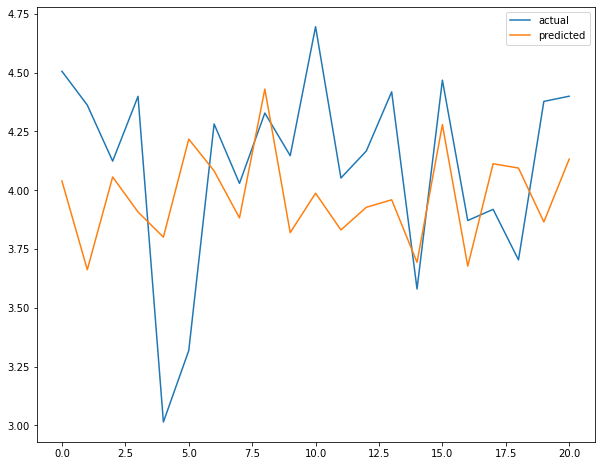

In [406]:
df_res5.actual.plot(figsize=(10,8),legend=True)
df_res5.predicted.plot(legend=True)

In [407]:
mse_st=mean_squared_error(df_res5.actual,df_res5.predicted)
rmse_st=mean_squared_error(df_res5.actual,df_res5.predicted,squared=False)
print('MSE:',mse_st)
print('RMSE:',rmse_st)

MSE: 0.18997689610328525
RMSE: 0.43586339156126114


In [408]:
st=pd.DataFrame(forecasted_st[-1:])
st.columns=['overall']
st

,overall
reviewTime,
2018-09-30,4.40002


In [409]:
arist=pd.DataFrame(arma3.forecast(10))
arist.columns=['overall']
forest=pd.concat([st,arist],axis=0)

Text(0, 0.5, 'Rating')

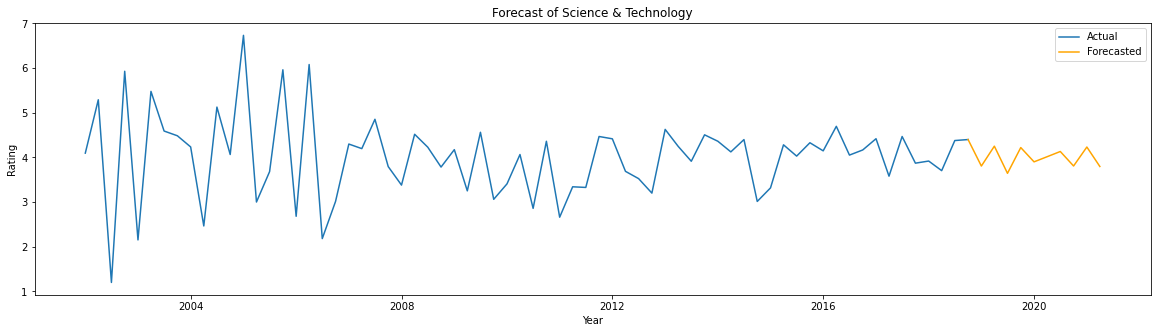

In [410]:
plt.figure(figsize=(20,5))
plt.plot(forecasted_st,label='Actual')
plt.plot(forest['overall'],color='orange',label='Forecasted')
plt.title('Forecast of Science & Technology')
plt.legend()
plt.xlabel('Year')
plt.ylabel('Rating')
#plt.ylim(0,5);

In [411]:
dict={'Type':['Professional','Life-Style','Fashion','Entertainment','Science & Technology'],'Model':['SARIMA','SARIMA','ARMA','ARMA','ARMA'],'Mean_squared_error':[mse_p,mse_ls,mse_f,mse_e,mse_st],'Root_mean_squared_error':[rmse_p,rmse_ls,rmse_f,rmse_e,rmse_st]}
compare=pd.DataFrame(dict)
compare

,Type,Model,Mean_squared_error,Root_mean_squared_error
0,Professional,SARIMA,0.018375,0.135555
1,Life-Style,SARIMA,0.052857,0.229906
2,Fashion,ARMA,0.014898,0.122057
3,Entertainment,ARMA,0.020333,0.142595
4,Science & Technology,ARMA,0.189977,0.435863


<AxesSubplot:>

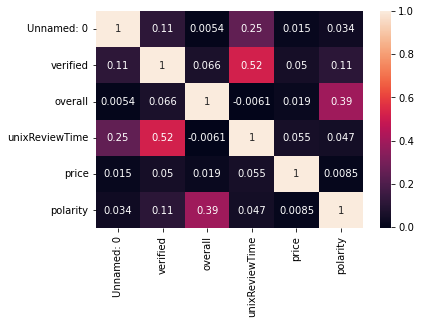

In [412]:
sns.heatmap(sampled.corr(),annot=True)

<AxesSubplot:>

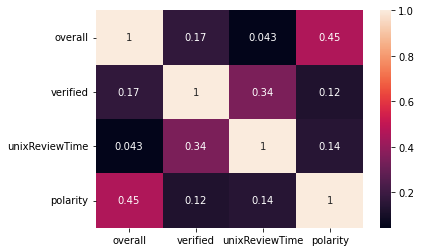

In [413]:
sns.heatmap(sample.corr(),annot=True)

In [414]:
from scipy.stats import pearsonr

In [415]:
corr,_=pearsonr(sampled['verified'][0:50000],sample['verified'][0:50000])
print('correlation:%.3f'%corr)

correlation:0.007


In [416]:
corr,_=pearsonr(sampled['overall'][0:50000],sample['overall'][0:50000])
print('correlation:%.3f'%corr)

correlation:0.003


In [417]:
s1=sampled.loc[:,['overall','verified','polarity']]
s2=sample.loc[:,['overall','verified','polarity']]

In [418]:
correlation = s1.corrwith(s2)
correlation

overall    -0.002328
verified   -0.011476
polarity   -0.001282
dtype: float64